# Importing common libraries

In [1]:
#!pip install pandas seaborn matplotlib numpy statsmodels scipy scikit-learn plotly-express PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stats
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import scipy as scipy
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

from scipy.stats.mstats import winsorize
import scipy.stats as stats
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,explained_variance_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve)

from statsmodels.tools.eval_measures import mse, rmse
from sklearn import preprocessing
%matplotlib inline


## df3 House Construction C.I Ireland 

In [2]:
df3=pd.read_csv("national_house_construction_cost_index_0.csv")

In [3]:
df3.head()

Unnamed: 0 NATIONAL HOUSE CONSTRUCTION COST INDEX Unnamed: 2  \
0  Base: January 1991 = 100                                    NaN        NaN   
1                     Month                                   1994       1995   
2                   January                                  109.2      113.5   
3                  February                                  109.3      114.1   
4                     March                                  109.4      114.1   

  Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1       1996       1997       1998       1999       2000       2001   
2      115.9        118      122.9      126.3      135.8      154.3   
3      115.7      118.5      123.1      126.4      136.1      154.7   
4      115.9      118.8      123.8      126.5      136.4      155.6   

  Unnamed: 9  ... Unnamed: 14 Unnamed: 15 Unnamed: 16 Unnamed: 17 Unnamed: 18  \
0        NaN  ...         NaN         NaN         NaN         NaN         NaN   
1       2002  ...        2007        2008        2009        2010        2011   
2      169.9  ...       198.8       207.4         208       206.9       210.2   
3        170  ...       198.8       208.2       207.3       207.2       210.5   
4      169.5  ...       199.4       208.6       206.8       207.3       200.7   

  Unnamed: 19 Unnamed: 20 Unnamed: 21 Unnamed: 22 Unnamed: 23  
0         NaN         NaN         NaN         NaN         NaN  
1        2012        2013        2014        2015      2016.0  
2       202.5       204.1       204.9       206.2       207.4  
3       202.6       204.2       205.4         206       207.1  
4       202.7       204.3       205.4       206.5         NaN  

[5 rows x 24 columns]

In [4]:
#Setting the first row of the table to column 2.

df3=pd.read_csv("national_house_construction_cost_index_0.csv", header=2)

In [5]:
df3.head()

Month   1994   1995   1996   1997   1998   1999   2000   2001   2002  \
0   January  109.2  113.5  115.9    118  122.9  126.3  135.8  154.3  169.9   
1  February  109.3  114.1  115.7  118.5  123.1  126.4  136.1  154.7    170   
2     March  109.4  114.1  115.9  118.8  123.8  126.5  136.4  155.6  169.5   
3     April  110.3  114.1  115.9  119.8  123.8  130.5  136.5  157.4  169.5   
4       May  110.1  114.1  115.9  119.8  124.5  130.5  136.8  157.6  169.5   

   ...   2007   2008   2009   2010   2011   2012   2013   2014   2015   2016  
0  ...  198.8  207.4    208  206.9  210.2  202.5  204.1  204.9  206.2  207.4  
1  ...  198.8  208.2  207.3  207.2  210.5  202.6  204.2  205.4    206  207.1  
2  ...  199.4  208.6  206.8  207.3  200.7  202.7  204.3  205.4  206.5    NaN  
3  ...    200  208.9  206.5  207.9    201  203.4  204.5  205.6  206.8    NaN  
4  ...  200.1  209.4  206.5  208.7  201.2  203.6  204.5  205.9  207.2    NaN  

[5 rows x 24 columns]

In [6]:
df3.columns

Index(['Month', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016'],
      dtype='object')

In [7]:
df3_new = pd.melt(df3, id_vars='Month', var_name='Year', value_name='Value')

In [8]:
df3_new

Month  Year  Value
0                        January  1994  109.2
1                       February  1994  109.3
2                          March  1994  109.4
3                          April  1994  110.3
4                            May  1994  110.1
..                           ...   ...    ...
317                      October  2016    NaN
318                     November  2016    NaN
319                     December  2016    NaN
320               Yearly average  2016    NaN
321  % Increase on previous year  2016    NaN

[322 rows x 3 columns]

In [9]:
df3.dtypes

Month     object
1994      object
1995      object
1996      object
1997      object
1998      object
1999      object
2000      object
2001      object
2002      object
2003      object
2004      object
2005      object
2006      object
2007      object
2008      object
2009      object
2010      object
2011      object
2012      object
2013      object
2014      object
2015      object
2016     float64
dtype: object

In [10]:
df3_transposed = df3.set_index('Month').T

In [11]:
df3_transposed

Month January February  March  April    May   June   July August September  \
1994    109.2    109.3  109.4  110.3  110.1  110.6  110.7  110.9     112.2   
1995    113.5    114.1  114.1  114.1  114.1  114.1  114.5  114.5     115.7   
1996    115.9    115.7  115.9  115.9  115.9    116    116    116     116.9   
1997      118    118.5  118.8  119.8  119.8  119.9  120.8    121     121.5   
1998    122.9    123.1  123.8  123.8  124.5  124.5  125.7  125.7       126   
1999    126.3    126.4  126.5  130.5  130.5  130.5  131.5  131.5     134.1   
2000    135.8    136.1  136.4  136.5  136.8  136.9  137.2  137.2     137.7   
2001    154.3    154.7  155.6  157.4  157.6  157.7  161.1  165.9       166   
2002    169.9      170  169.5  169.5  169.5  169.7  173.8  173.9     173.9   
2003    174.2    174.5  174.5  177.3  177.3  177.4  177.1  177.2     177.2   
2004    179.6    179.7  179.9  179.9    180  180.2  181.1  182.2     182.2   
2005    184.7    184.8  184.9  186.5  186.6  186.6  186.7  186.9     186.9   
2006    189.9    190.1  190.6    194  194.2  194.3  194.4  194.5     194.6   
2007    198.8    198.8  199.4    200  200.1  200.3  203.7  203.6     203.7   
2008    207.4    208.2  208.6  208.9  209.4  209.9  210.4  210.4     210.5   
2009      208    207.3  206.8  206.5  206.5    206    206    206     206.1   
2010    206.9    207.2  207.3  207.9  208.7  208.6  209.4  209.6     209.5   
2011    210.2    210.5  200.7    201  201.2  201.4  201.5  201.9     202.1   
2012    202.5    202.6  202.7  203.4  203.6  203.6  204.1  204.1     203.7   
2013    204.1    204.2  204.3  204.5  204.5  204.8  204.8    205     205.1   
2014    204.9    205.4  205.4  205.6  205.9    206    206  206.6     206.4   
2015    206.2      206  206.5  206.8  207.2  207.6  207.4  207.4     207.3   
2016    207.4    207.1    NaN    NaN    NaN    NaN    NaN    NaN       NaN   

Month October November December Yearly average % Increase on previous year  
1994    112.7    112.9    113.1            111                       3.40%  
1995    115.8    115.9    115.9          114.7                       3.30%  
1996    117.1    117.2    117.2          116.3                       1.40%  
1997      122    122.6    122.6          120.4                       3.50%  
1998    126.2    126.2    126.1          124.9                       3.70%  
1999    134.7    134.8    134.9            131                       4.90%  
2000    153.8    153.8    153.9            141                       7.60%  
2001    169.3    169.4    169.3          161.5                      14.50%  
2002    173.9      174    174.1          171.8                       6.40%  
2003    177.2    177.2    177.2          176.5                       2.70%  
2004    183.9    184.2    184.2          181.5                       2.80%  
2005    189.5    189.4    189.7          186.9                       3.00%  
2006    197.7      198    198.1          194.2                       3.90%  
2007    203.8    203.8    204.2          201.7                       3.90%  
2008    210.1    209.9    209.3          209.4                       3.80%  
2009    206.2    206.2    206.2          206.5                      -1.40%  
2010    209.5    209.5    209.8          208.7                       1.10%  
2011      202    202.2    202.3          203.1                      -2.70%  
2012    203.8      204    204.2          203.5                       0.20%  
2013    205.4    205.4    204.7          204.7                       0.60%  
2014    206.7    206.5    206.2            206                       0.60%  
2015    207.2    207.6    207.4          207.1                       0.50%  
2016      NaN      NaN      NaN            NaN                         NaN

In [12]:
#Number of NaN values for 2016. Data only present for January. Drop the row

df3_transposed=df3_transposed.drop(["2016"], axis=0)

In [13]:
df3_transposed.reset_index(inplace=True)

In [14]:
df3_new = df3_transposed.iloc[:,: -2]

# Use the melt function to reshape the DataFrame
df3_new = pd.melt(df3_transposed, id_vars='index', var_name='Month', value_name='Value', value_vars=df3_transposed.columns[:-2])

# Rename the columns
df3_new.rename(columns={'index': 'Year'}, inplace=True)

# Sort the DataFrame by Year and Month
df3_new.sort_values(['Year', 'Month'], inplace=True)

In [15]:
df3_new

Year      Month  Value
66   1994      April  110.3
154  1994     August  110.9
242  1994   December  113.1
22   1994   February  109.3
0    1994    January  109.2
..    ...        ...    ...
65   2015      March  206.5
109  2015        May  207.2
241  2015   November  207.6
219  2015    October  207.2
197  2015  September  207.3

[264 rows x 3 columns]

In [16]:
df3_new['Statistic Label'] = 'House Construction Cost Index'

df3_new.rename(columns={'Value':'VALUE'}, inplace=True)

In [17]:
df3_new

Year      Month  VALUE                Statistic Label
66   1994      April  110.3  House Construction Cost Index
154  1994     August  110.9  House Construction Cost Index
242  1994   December  113.1  House Construction Cost Index
22   1994   February  109.3  House Construction Cost Index
0    1994    January  109.2  House Construction Cost Index
..    ...        ...    ...                            ...
65   2015      March  206.5  House Construction Cost Index
109  2015        May  207.2  House Construction Cost Index
241  2015   November  207.6  House Construction Cost Index
219  2015    October  207.2  House Construction Cost Index
197  2015  September  207.3  House Construction Cost Index

[264 rows x 4 columns]

## df4 Residential Property Price Index Ireland 

In [18]:
df4=pd.read_csv("Residential_Prop_Price_Index.csv")

In [19]:
df4.head()

Statistic Label         Month  \
0  Residential Property Price Index  2005 January   
1  Residential Property Price Index  2005 January   
2  Residential Property Price Index  2005 January   
3  Residential Property Price Index  2005 January   
4  Residential Property Price Index  2005 January   

            Type of Residential Property           UNIT  VALUE  
0  National - all residential properties  Base 2015=100  124.9  
1                      National - houses  Base 2015=100  120.7  
2                  National - apartments  Base 2015=100  153.4  
3    Dublin - all residential properties  Base 2015=100  118.5  
4                        Dublin - houses  Base 2015=100  112.0

Just want the values for National. Do not want the individual areas as results in unnecessary complication.

In [20]:
df4=df4.rename(columns={"Type of Residential Property": "Type_of_Residential_Property"})

In [21]:
df4

Statistic Label          Month  \
0                       Residential Property Price Index   2005 January   
1                       Residential Property Price Index   2005 January   
2                       Residential Property Price Index   2005 January   
3                       Residential Property Price Index   2005 January   
4                       Residential Property Price Index   2005 January   
...                                                  ...            ...   
17435  Percentage Change over 12 months for Residenti...  2023 February   
17436  Percentage Change over 12 months for Residenti...  2023 February   
17437  Percentage Change over 12 months for Residenti...  2023 February   
17438  Percentage Change over 12 months for Residenti...  2023 February   
17439  Percentage Change over 12 months for Residenti...  2023 February   

                Type_of_Residential_Property           UNIT  VALUE  
0      National - all residential properties  Base 2015=100  124.9  
1                          National - houses  Base 2015=100  120.7  
2                      National - apartments  Base 2015=100  153.4  
3        Dublin - all residential properties  Base 2015=100  118.5  
4                            Dublin - houses  Base 2015=100  112.0  
...                                      ...            ...    ...  
17435                          West - houses              %    8.1  
17436                      Mid-East - houses              %    6.7  
17437                      Mid-West - houses              %    4.9  
17438                    South-East - houses              %    5.7  
17439                    South-West - houses              %    6.4  

[17440 rows x 5 columns]

In [22]:
keep = ["National -"]

# Drop rows that do not contain any of the strings in 'keep'
# .strip() removes whitespace
df4 = df4[df4['Type_of_Residential_Property'].str.strip().str.contains('|'.join(keep))]

Ref - https://www.geeksforgeeks.org/how-to-drop-rows-that-contain-a-specific-string-in-pandas/

In [23]:
df4.head()

Statistic Label          Month  \
0   Residential Property Price Index   2005 January   
1   Residential Property Price Index   2005 January   
2   Residential Property Price Index   2005 January   
20  Residential Property Price Index  2005 February   
21  Residential Property Price Index  2005 February   

             Type_of_Residential_Property           UNIT  VALUE  
0   National - all residential properties  Base 2015=100  124.9  
1                       National - houses  Base 2015=100  120.7  
2                   National - apartments  Base 2015=100  153.4  
20  National - all residential properties  Base 2015=100  125.9  
21                      National - houses  Base 2015=100  121.8

In [24]:
df4label = df4.groupby(by=['Statistic Label']).size()
print(df4label)

Statistic Label
Percentage Change over 1 month for Residential Property Price Index      654
Percentage Change over 12 months for Residential Property Price Index    654
Percentage Change over 3 months for Residential Property Price Index     654
Residential Property Price Index                                         654
dtype: int64


Only interested in the Residential Property Price Index for the purpose of this assignment. 

In [25]:
df4_filt = df4[df4['Statistic Label'] == 'Residential Property Price Index']

In [26]:
df4_filt.head()

Statistic Label          Month  \
0   Residential Property Price Index   2005 January   
1   Residential Property Price Index   2005 January   
2   Residential Property Price Index   2005 January   
20  Residential Property Price Index  2005 February   
21  Residential Property Price Index  2005 February   

             Type_of_Residential_Property           UNIT  VALUE  
0   National - all residential properties  Base 2015=100  124.9  
1                       National - houses  Base 2015=100  120.7  
2                   National - apartments  Base 2015=100  153.4  
20  National - all residential properties  Base 2015=100  125.9  
21                      National - houses  Base 2015=100  121.8

In [27]:
df4_filt.dtypes

Statistic Label                  object
Month                            object
Type_of_Residential_Property     object
UNIT                             object
VALUE                           float64
dtype: object

In [28]:
date = df4_filt['Month'].str.split(pat = ' ', n = 1, expand = True)

In [29]:
date = date.rename(columns={' 0': 'Year', ' 1': 'Month'})

In [30]:
date

0         1
0     2005   January
1     2005   January
2     2005   January
20    2005  February
21    2005  February
...    ...       ...
4321  2023   January
4322  2023   January
4340  2023  February
4341  2023  February
4342  2023  February

[654 rows x 2 columns]

In [31]:
df4_filt.head()

Statistic Label          Month  \
0   Residential Property Price Index   2005 January   
1   Residential Property Price Index   2005 January   
2   Residential Property Price Index   2005 January   
20  Residential Property Price Index  2005 February   
21  Residential Property Price Index  2005 February   

             Type_of_Residential_Property           UNIT  VALUE  
0   National - all residential properties  Base 2015=100  124.9  
1                       National - houses  Base 2015=100  120.7  
2                   National - apartments  Base 2015=100  153.4  
20  National - all residential properties  Base 2015=100  125.9  
21                      National - houses  Base 2015=100  121.8

In [32]:
df4_filt = df4_filt.drop('Month', axis=1)

In [33]:
df4_filt.insert(loc = 3, column = 'Year', value = date[0])


df4_filt.insert(loc = 4, column = 'Month', value = date[1])

In [34]:
df4_filt.columns

Index(['Statistic Label', 'Type_of_Residential_Property', 'UNIT', 'Year',
       'Month', 'VALUE'],
      dtype='object')

In [35]:
df4_filt 

Statistic Label           Type_of_Residential_Property  \
0     Residential Property Price Index  National - all residential properties   
1     Residential Property Price Index                      National - houses   
2     Residential Property Price Index                  National - apartments   
20    Residential Property Price Index  National - all residential properties   
21    Residential Property Price Index                      National - houses   
...                                ...                                    ...   
4321  Residential Property Price Index                      National - houses   
4322  Residential Property Price Index                  National - apartments   
4340  Residential Property Price Index  National - all residential properties   
4341  Residential Property Price Index                      National - houses   
4342  Residential Property Price Index                  National - apartments   

               UNIT  Year     Month  VALUE  
0     Base 2015=100  2005   January  124.9  
1     Base 2015=100  2005   January  120.7  
2     Base 2015=100  2005   January  153.4  
20    Base 2015=100  2005  February  125.9  
21    Base 2015=100  2005  February  121.8  
...             ...   ...       ...    ...  
4321  Base 2015=100  2023   January  168.2  
4322  Base 2015=100  2023   January  166.6  
4340  Base 2015=100  2023  February  167.1  
4341  Base 2015=100  2023  February  167.5  
4342  Base 2015=100  2023  February  166.9  

[654 rows x 6 columns]

## df3 & df4 Combined

In [36]:
merged = pd.merge(df3_new,df4_filt, on=["Year","Month"], how="left")

In [37]:
merged

Year      Month VALUE_x              Statistic Label_x  \
0    1994      April   110.3  House Construction Cost Index   
1    1994     August   110.9  House Construction Cost Index   
2    1994   December   113.1  House Construction Cost Index   
3    1994   February   109.3  House Construction Cost Index   
4    1994    January   109.2  House Construction Cost Index   
..    ...        ...     ...                            ...   
523  2015    October   207.2  House Construction Cost Index   
524  2015    October   207.2  House Construction Cost Index   
525  2015  September   207.3  House Construction Cost Index   
526  2015  September   207.3  House Construction Cost Index   
527  2015  September   207.3  House Construction Cost Index   

                    Statistic Label_y           Type_of_Residential_Property  \
0                                 NaN                                    NaN   
1                                 NaN                                    NaN   
2                                 NaN                                    NaN   
3                                 NaN                                    NaN   
4                                 NaN                                    NaN   
..                                ...                                    ...   
523  Residential Property Price Index                      National - houses   
524  Residential Property Price Index                  National - apartments   
525  Residential Property Price Index  National - all residential properties   
526  Residential Property Price Index                      National - houses   
527  Residential Property Price Index                  National - apartments   

              UNIT  VALUE_y  
0              NaN      NaN  
1              NaN      NaN  
2              NaN      NaN  
3              NaN      NaN  
4              NaN      NaN  
..             ...      ...  
523  Base 2015=100    103.2  
524  Base 2015=100    103.3  
525  Base 2015=100    102.4  
526  Base 2015=100    102.2  
527  Base 2015=100    101.6  

[528 rows x 8 columns]

In [38]:
merged = merged.rename(columns={'VALUE_x': 'Construction_Cost_Index', 'VALUE_y': 'Property_Price_Index'})

merged = merged.drop(['Statistic Label_x', 'UNIT', 'Statistic Label_y', 'Type_of_Residential_Property'], axis=1)

In [39]:
merged[["Year","Construction_Cost_Index"]]=merged[["Year","Construction_Cost_Index"]].apply(pd.to_numeric)

In [40]:
merged.head()

Year     Month  Construction_Cost_Index  Property_Price_Index
0  1994     April                    110.3                   NaN
1  1994    August                    110.9                   NaN
2  1994  December                    113.1                   NaN
3  1994  February                    109.3                   NaN
4  1994   January                    109.2                   NaN

In [41]:
#For the purpose of visualisation, want the year and month to show as date times.
merged['Date'] = pd.to_datetime(merged['Year'].astype(str) + '-' + merged['Month'], format='%Y-%B')

# Plotting the index data against the datetime column using plt
plt.plot(merged['Date'], merged['Construction_Cost_Index'], label='Construction_Cost_Index')
plt.plot(merged['Date'], merged['Property_Price_Index'], label='Property_Price_Index')

plt.xlabel('Date')
plt.ylabel('Indices Value')
plt.title('Indices over time')
plt.legend()
plt.xticks(rotation=45);

In [42]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 0 to 527
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Year                     528 non-null    int64         
 1   Month                    528 non-null    object        
 2   Construction_Cost_Index  528 non-null    float64       
 3   Property_Price_Index     396 non-null    float64       
 4   Date                     528 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 24.8+ KB


In [43]:
#Get the correlation of the merged df.
#Exclude non-numeric columns from correlation calculation
numeric_columns = merged.select_dtypes(include=[float, int]).columns
corr = merged[numeric_columns].corr()

<AxesSubplot:>

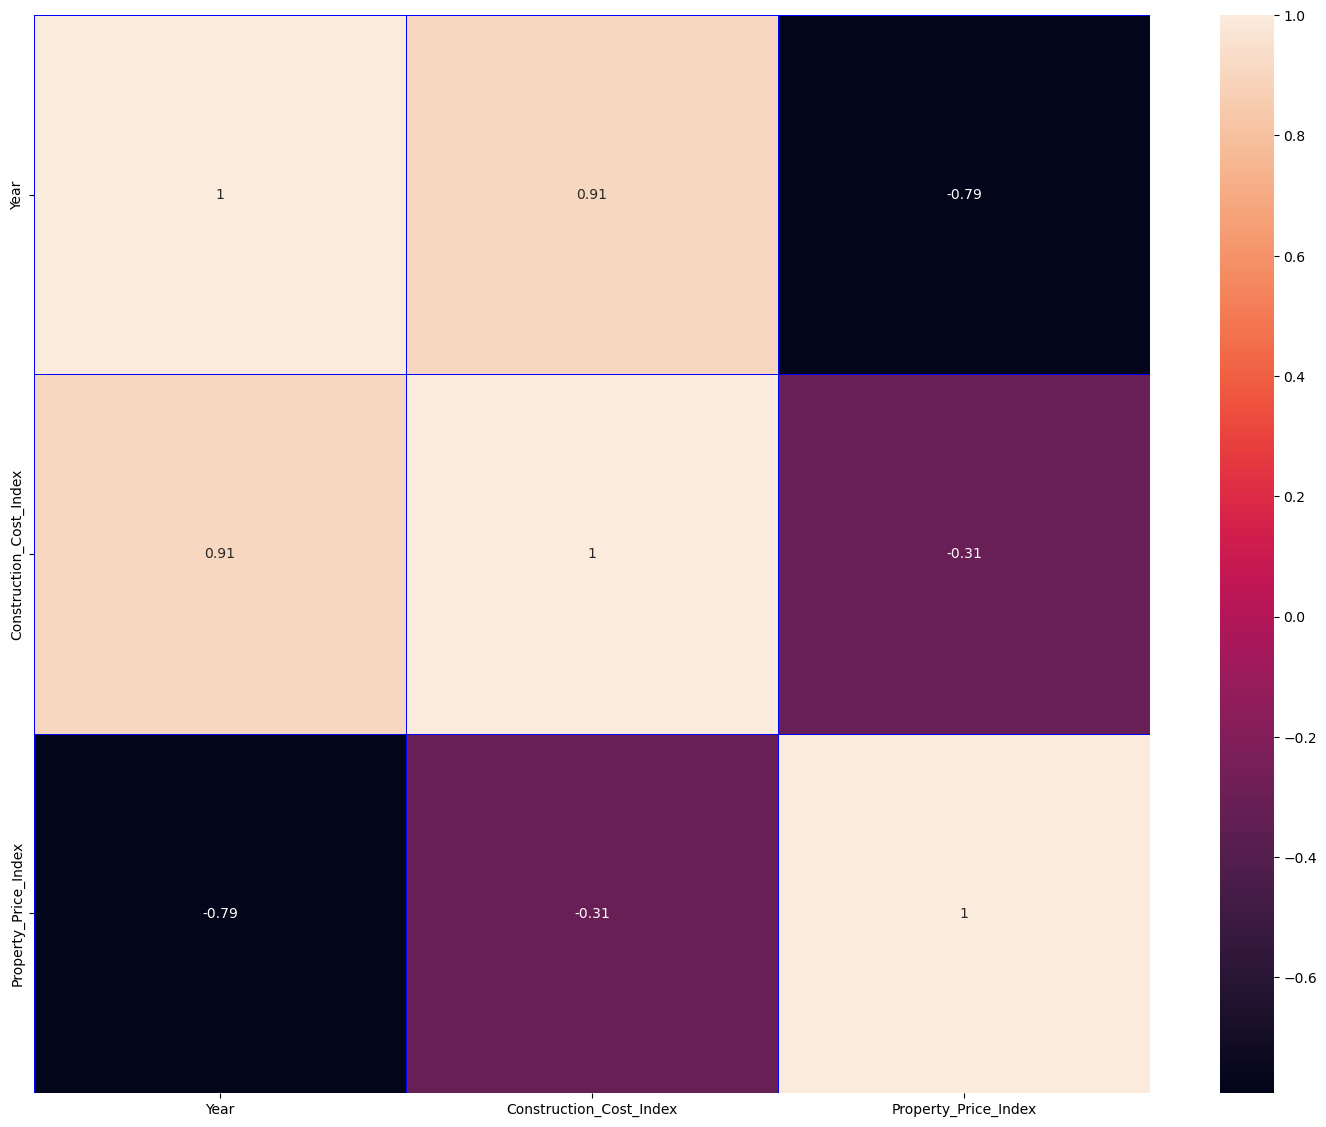

In [44]:
plt.figure(figsize=(18,14))
sns.heatmap(corr,annot=True,linecolor="blue",lw=0.5)

In [45]:
merged.isnull().sum()

Year                         0
Month                        0
Construction_Cost_Index      0
Property_Price_Index       132
Date                         0
dtype: int64

In [46]:
merged.dropna(axis=0, inplace=True)

## df5 Construction Indices 

In [47]:
df5=pd.read_csv("download1061915290288055378.csv")

In [48]:
df5.head()

FeatureCode  DateCode Measurement  Units  Value     Construction indices
0   K02000001  2011 Feb       Costs    NaN  103.1              New Housing
1   K02000001  2011 Feb       Costs    NaN  104.4                 All work
2   K02000001  2011 Feb       Costs    NaN  105.0           Other new work
3   K02000001  2011 Feb       Costs    NaN  103.7  Repairs and maintenance
4   K02000001  2016 Aug       Costs    NaN  110.1              New Housing

In [49]:
df5 = df5.drop(["FeatureCode","Measurement","Units"], axis=1)

In [50]:
df5.head()

DateCode  Value     Construction indices
0  2011 Feb  103.1              New Housing
1  2011 Feb  104.4                 All work
2  2011 Feb  105.0           Other new work
3  2011 Feb  103.7  Repairs and maintenance
4  2016 Aug  110.1              New Housing

In [51]:
df5.dtypes

DateCode                 object
Value                   float64
Construction indices     object
dtype: object

In [52]:
df5.sort_values(by=["DateCode"], inplace=True)

In [53]:
df5.head()

DateCode  Value        Construction indices
466  2000 Q1  102.4  Index of hourly wage costs
152  2000 Q2   98.1  Index of hourly wage costs
90   2000 Q3   99.8  Index of hourly wage costs
351  2000 Q4   99.8  Index of hourly wage costs
201  2001 Q1  110.4  Index of hourly wage costs

In [54]:
#Index of hourly wage is not required, therefore dropped.
df5.drop(df5[df5['Construction indices'] == 'Index of hourly wage costs'].index, inplace=True)

In [55]:
#Converting the datecode column to datetime format with year and month.
df5['DateCode'] = pd.to_datetime(df5['DateCode'])
df5['DateCode'] = df5['DateCode'].dt.strftime('%Y-%m')

In [56]:
df5.head()

DateCode  Value     Construction indices
366  2010-12  101.4                 All work
365  2010-12  102.0              New Housing
364  2010-12  102.2  Repairs and maintenance
363  2010-12  101.3           Other new work
83   2010-11  102.5  Repairs and maintenance

In [57]:
#using pivot to restructure the df and create seperate columns for each construction index
df5_pivot = df5.pivot(index='DateCode', columns='Construction indices', values='Value')

In [58]:
#Reset index
df5_pivot = df5_pivot.reset_index()

In [59]:
df5_pivot.head()

Construction indices DateCode  All work  New Housing  Other new work  \
0                     2010-11     101.7        102.3           101.3   
1                     2010-12     101.4        102.0           101.3   
2                     2011-01     103.1        102.2           103.5   
3                     2011-02     104.4        103.1           105.0   
4                     2011-03     105.6        103.7           106.5   

Construction indices  Repairs and maintenance  
0                                       102.5  
1                                       102.2  
2                                       102.6  
3                                       103.7  
4                                       104.4

In [60]:
df5_pivot.dtypes

Construction indices
DateCode                    object
All work                   float64
New Housing                float64
Other new work             float64
Repairs and maintenance    float64
dtype: object

In [61]:
#Need to specify date time format after pivotting
df5_pivot['DateCode'] = pd.to_datetime(df5_pivot['DateCode'], format='%Y-%m')

## df6 Index of Employment in Construction 

In [62]:
df6=pd.read_csv("BBA02.20230428105548.csv")

In [63]:
df6.head()

STATISTIC                                    Statistic Label C02196V02652  \
0     BBA02  Annual Average Index of Employment (1975 - Dat...            -   
1     BBA02  Annual Average Index of Employment (1975 - Dat...            -   
2     BBA02  Annual Average Index of Employment (1975 - Dat...            -   
3     BBA02  Annual Average Index of Employment (1975 - Dat...            -   
4     BBA02  Annual Average Index of Employment (1975 - Dat...            -   

   State  TLIST(A1)  Year           UNIT  VALUE  
0  State       1975  1975  Base 2000=100  133.2  
1  State       1976  1976  Base 2000=100  128.1  
2  State       1977  1977  Base 2000=100  134.8  
3  State       1978  1978  Base 2000=100  147.0  
4  State       1979  1979  Base 2000=100  158.8

In [64]:
#Dropping columns that are not of value
df6 = df6.drop(["C02196V02652","TLIST(A1)","UNIT", "STATISTIC", "State","Statistic Label"], axis=1)

In [65]:
df6.head()

Year  VALUE
0  1975  133.2
1  1976  128.1
2  1977  134.8
3  1978  147.0
4  1979  158.8

In [66]:
#Data is in appropriate time format.
df6.dtypes

Year       int64
VALUE    float64
dtype: object

In [67]:
#Using distribution plot from seaborn to look at the shape of the data
sns.displot(data=df6, x="VALUE", kind="kde")

# Classification

In [68]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [69]:
#suppress any warnings
import warnings
warnings.filterwarnings('ignore') 

### Using Construction Cost/Property Price Index dataset ('merged')

In [70]:
merged.head()

Year   Month  Construction_Cost_Index  Property_Price_Index       Date
132  2005   April                    186.5                 127.5 2005-04-01
133  2005   April                    186.5                 123.7 2005-04-01
134  2005   April                    186.5                 153.5 2005-04-01
135  2005  August                    186.9                 133.8 2005-08-01
136  2005  August                    186.9                 130.2 2005-08-01

In [71]:
#We have year and month, will drop date column.
merged=merged.drop('Date', axis=1)

In [72]:
#Data types are appropriate
merged.dtypes

Year                         int64
Month                       object
Construction_Cost_Index    float64
Property_Price_Index       float64
dtype: object

In [73]:
# Split the dataset into features (X) and target variable (y)
X = merged[['Construction_Cost_Index','Property_Price_Index']]
y = merged['Year']

# Split the dataset into training and testing. Taking 20% test size, 80% training size. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Transform using standard scaler.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Verify the sizes of the resulting splits
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")
#https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn

Training set size: 316
Testing set size: 80


In [74]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape
#Look at the shape of the test and train array.

((316, 2), (316,), (80, 2), (80,))

## KNN

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [76]:
#Specifying number of neighbors as 9 for KNN
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [77]:
#Defining y_pred
y_pred = knn.predict(X_test)

In [78]:
#Getting accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.925


In [79]:
#Naive Bayes CV score 
nvclassifier = GaussianNB()
cross_val_score(nvclassifier, X, y, scoring='accuracy', cv = 30).mean()

0.8523809523809525

In [80]:
#Looking at a range of k values
k_values = [i for i in range (1,31)]
scores = []

#Using standard scaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=30)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

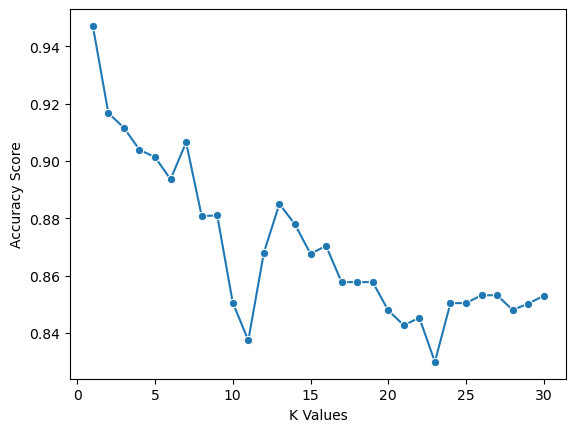

In [81]:
#Plotting the accuracy score for varying k values.
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

Ref - #https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn

In [82]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [83]:
#Getting accuracy, precison and recall scores for knn.
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,  average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.975
Precision: 0.9696969696969698
Recall: 0.9696969696969698


In [84]:
# number of neighbors
neighbors = np.arange(1, 31) 

# Declare and initialise the matrix
train_accuracy = np.zeros(len(neighbors))    
test_accuracy = np.zeros(len(neighbors))     

In [85]:
# for loop which checks the model for neighbor values
for i,k in enumerate(neighbors):                          
    knn = KNeighborsClassifier(n_neighbors = k)        

    #Fit the model
    knn.fit(X_train, y_train)                      

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)   # Save the score value in the train_accuracy array

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)      # Save the score value in the train_accuracy array

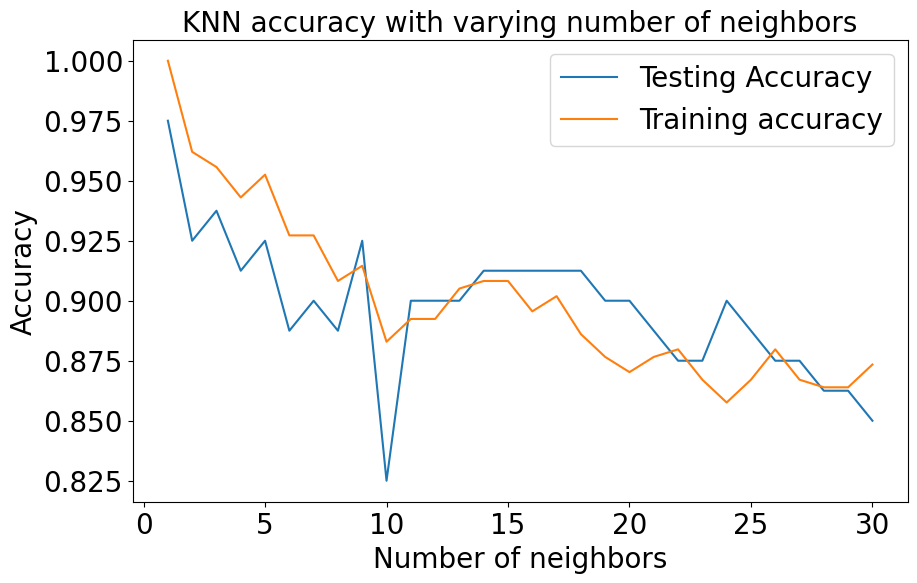

In [86]:
# Delcare the size of the array and plot
plt.figure(figsize = (10, 6))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend(prop = {'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [87]:
# Declare and initialise an object 'KNeighborsClassifier' with 9 neighbors
knn = KNeighborsClassifier(n_neighbors = 9)

# Fit the model
knn.fit(X_train, y_train)

# Compute accuracy on the training set
train_accuracy = knn.score(X_train, y_train)

# Compute accuracy on the test set
test_accuracy = knn.score(X_test, y_test)

In [88]:
# Display the test accuracy
print(test_accuracy)

0.925


In [89]:
# import library for confusion matrix
from sklearn.metrics import confusion_matrix

# Predict the results by calling a method 'predict()'
prediction = knn.predict(X_test)

# Display the confusion matrix
confusion_matrix(y_test, prediction)

array([[11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 10,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  6,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  7,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6]])

In [90]:
# Display the report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

        2005       0.85      1.00      0.92        11
        2006       0.86      0.75      0.80         8
        2007       1.00      0.91      0.95        11
        2008       0.90      1.00      0.95         9
        2009       1.00      0.86      0.92         7
        2010       1.00      1.00      1.00         6
        2011       1.00      1.00      1.00         3
        2012       1.00      1.00      1.00         7
        2013       0.86      1.00      0.92         6
        2014       1.00      0.67      0.80         6
        2015       0.86      1.00      0.92         6

    accuracy                           0.93        80
   macro avg       0.94      0.93      0.93        80
weighted avg       0.93      0.93      0.92        80



In [91]:
#Cross validation score
knn_classifier = KNeighborsClassifier()
cross_val_score(knn_classifier, merged.iloc[:, [2, 3]].values, merged.iloc[:, 0].values, scoring='accuracy', cv=30).mean()

0.8675824175824176

## Decision Tree Classification

In [92]:
# Using 'Construction_Cost_Index: 2' and 'Property_Price_Index: 3' features into X
X = merged.iloc[:, [2, 3]].values

# Store the 'Year' feature into 'y'
y = merged.iloc[:, 0].values

# Display X and y
print(X, y)

[[186.5 127.5]
 [186.5 123.7]
 [186.5 153.5]
 [186.9 133.8]
 [186.9 130.2]
 [186.9 155.8]
 [189.7 140.7]
 [189.7 136.5]
 [189.7 166.4]
 [184.8 125.9]
 [184.8 121.8]
 [184.8 153.8]
 [184.7 124.9]
 [184.7 120.7]
 [184.7 153.4]
 [186.7 131.6]
 [186.7 128.2]
 [186.7 153.6]
 [186.6 129.5]
 [186.6 126. ]
 [186.6 153.2]
 [184.9 126.6]
 [184.9 122.7]
 [184.9 153.7]
 [186.6 128.4]
 [186.6 124.6]
 [186.6 153.7]
 [189.4 139.3]
 [189.4 135.3]
 [189.4 163.4]
 [189.5 138.1]
 [189.5 134.1]
 [189.5 161.4]
 [186.9 135.2]
 [186.9 131.3]
 [186.9 158.3]
 [194.  144.6]
 [194.  140.5]
 [194.  172.7]
 [194.5 157.1]
 [194.5 153. ]
 [194.5 182.5]
 [198.1 160.6]
 [198.1 156.5]
 [198.1 189. ]
 [190.1 141.7]
 [190.1 137.7]
 [190.1 169. ]
 [189.9 141.4]
 [189.9 137.3]
 [189.9 167.8]
 [194.4 153.7]
 [194.4 149.7]
 [194.4 179.1]
 [194.3 150.3]
 [194.3 146.2]
 [194.3 176.9]
 [190.6 142.5]
 [190.6 138.5]
 [190.6 170.1]
 [194.2 147.6]
 [194.2 143.4]
 [194.2 175. ]
 [198.  159.4]
 [198.  155.2]
 [198.  187.8]
 [197.7 15

In [93]:
# Load the library 'sklearn.tree'
from sklearn.tree import DecisionTreeClassifier

# Create and initialise a DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_features=2)

# Train the classifier by calling a method 'fit()'
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features=2, random_state=0)

In [94]:
# Calculate the predicted vlaue by calling a method predict()
y_pred = classifier.predict(X_test)

              precision    recall  f1-score   support

        2005       1.00      1.00      1.00        11
        2006       1.00      1.00      1.00         8
        2007       1.00      1.00      1.00        11
        2008       0.90      1.00      0.95         9
        2009       1.00      0.57      0.73         7
        2010       0.75      1.00      0.86         6
        2011       1.00      1.00      1.00         3
        2012       1.00      1.00      1.00         7
        2013       0.86      1.00      0.92         6
        2014       1.00      0.83      0.91         6
        2015       1.00      1.00      1.00         6

    accuracy                           0.95        80
   macro avg       0.96      0.95      0.94        80
weighted avg       0.96      0.95      0.95        80



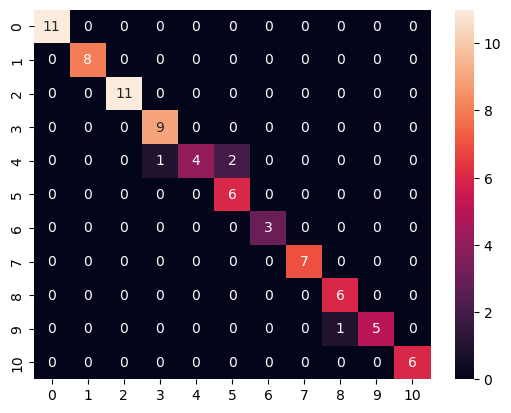

In [95]:
# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

# print the classification_report based on y_test and y_predict
print(classification_report(y_test, y_pred))

In [96]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.95


In [97]:
#CV score for cv=10
dt_classifier = DecisionTreeClassifier()
cross_val_score(dt_classifier, merged.iloc[:, [2, 3]].values, merged.iloc[:, 0].values, scoring='accuracy', cv=10).mean()

0.8845512820512822

In [98]:
#CV score for cv=20
dt_classifier = DecisionTreeClassifier()
cross_val_score(dt_classifier, merged.iloc[:, [2, 3]].values, merged.iloc[:, 0].values, scoring='accuracy', cv=20).mean()

0.9122368421052632

In [99]:
#CV score for cv=30
dt_classifier = DecisionTreeClassifier()
cross_val_score(dt_classifier, merged.iloc[:, [2, 3]].values, merged.iloc[:, 0].values, scoring='accuracy', cv=30).mean()

0.9315018315018316

[Text(0.6212121212121212, 0.9666666666666667, 'X[1] <= -0.032\nentropy = 3.455\nsamples = 316\nvalue = [25, 28, 25, 27, 29, 30, 33, 29, 30, 30, 30]'),
 Text(0.3939393939393939, 0.9, 'X[1] <= -0.547\nentropy = 2.584\nsamples = 182\nvalue = [0, 0, 0, 0, 0, 30, 33, 29, 30, 30, 30]'),
 Text(0.15151515151515152, 0.8333333333333334, 'X[0] <= -0.118\nentropy = 1.988\nsamples = 112\nvalue = [0, 0, 0, 0, 0, 0, 31, 29, 30, 22, 0]'),
 Text(0.12121212121212122, 0.7666666666666667, 'entropy = 0.0\nsamples = 28\nvalue = [0, 0, 0, 0, 0, 0, 28, 0, 0, 0, 0]'),
 Text(0.18181818181818182, 0.7666666666666667, 'X[0] <= 0.175\nentropy = 1.738\nsamples = 84\nvalue = [0, 0, 0, 0, 0, 0, 3, 29, 30, 22, 0]'),
 Text(0.06060606060606061, 0.7, 'X[0] <= 0.143\nentropy = 0.661\nsamples = 35\nvalue = [0, 0, 0, 0, 0, 0, 0, 29, 6, 0, 0]'),
 Text(0.030303030303030304, 0.6333333333333333, 'entropy = 0.0\nsamples = 22\nvalue = [0, 0, 0, 0, 0, 0, 0, 22, 0, 0, 0]'),
 Text(0.09090909090909091, 0.6333333333333333, 'X[1] <= -1.

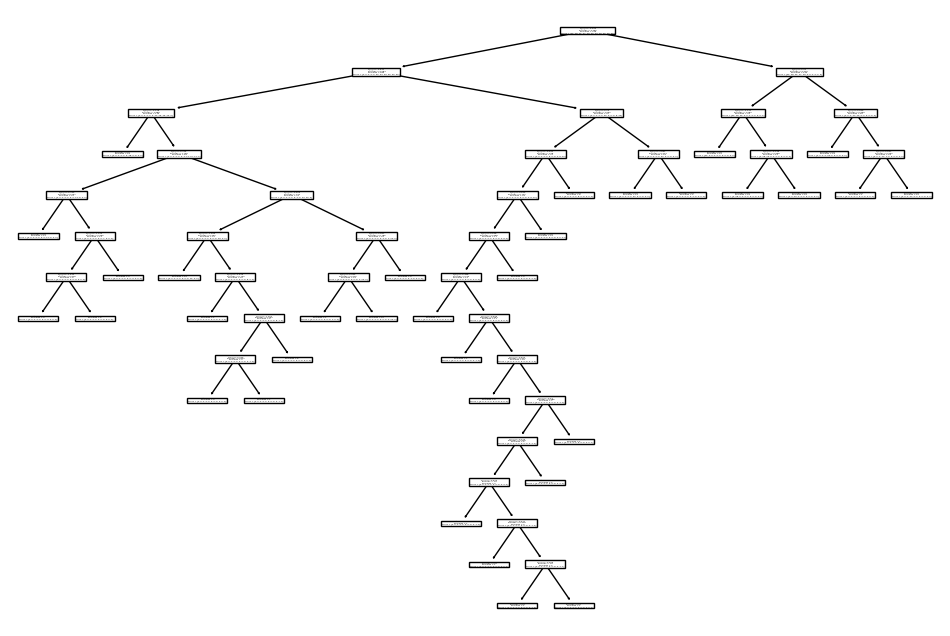

In [100]:
# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(classifier.fit(X_train, y_train))

## SVM Classification

In [101]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing set using 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit the SVM model on the training data, using kernel=poly
svm = SVC(kernel='poly', C=10, random_state=42)
svm.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm.predict(X_test)

# Evaluate accuracy and other metrics
print('Accuracy:', accuracy_score(y_test, y_pred))

print('Classification report:', classification_report(y_test, y_pred))

Accuracy: 0.85
Classification report:               precision    recall  f1-score   support

        2005       1.00      1.00      1.00        11
        2006       0.80      1.00      0.89         8
        2007       1.00      0.82      0.90        11
        2008       0.90      1.00      0.95         9
        2009       1.00      0.86      0.92         7
        2010       0.83      0.83      0.83         6
        2011       1.00      0.67      0.80         3
        2012       1.00      0.71      0.83         7
        2013       0.57      0.67      0.62         6
        2014       0.60      0.50      0.55         6
        2015       0.67      1.00      0.80         6

    accuracy                           0.85        80
   macro avg       0.85      0.82      0.83        80
weighted avg       0.87      0.85      0.85        80



In [102]:
#Specify classifier as SVM with linear kernel
from sklearn import svm
clf = svm.SVC(kernel='linear', C=10).fit(X_train, y_train)
clf.score(X_test, y_test)

0.875

In [103]:
#Get the accuracy using the above classifier
svm_classifier = SVC()
accuracy_scores = cross_val_score(svm_classifier, merged.iloc[:, [2, 3]].values, merged.iloc[:, 0].values, scoring='accuracy', cv=30)
mean_accuracy = accuracy_scores.mean()
print("Mean Accuracy: ", mean_accuracy)

Mean Accuracy:  0.6146520146520146


## Hyperparameter tuning GridSearchCV

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ................C=0.1, kernel=poly;, score=0.359 total time=   0.0s
[CV 2/5] END ................C=0.1, kernel=poly;, score=0.381 total time=   0.0s
[CV 3/5] END ................C=0.1, kernel=poly;, score=0.397 total time=   0.0s
[CV 4/5] END ................C=0.1, kernel=poly;, score=0.302 total time=   0.0s
[CV 5/5] END ................C=0.1, kernel=poly;, score=0.317 total time=   0.0s
[CV 1/5] END ..................C=1, kernel=poly;, score=0.672 total time=   0.0s
[CV 2/5] END ..................C=1, kernel=poly;, score=0.698 total time=   0.0s
[CV 3/5] END ..................C=1, kernel=poly;, score=0.730 total time=   0.0s
[CV 4/5] END ..................C=1, kernel=poly;, score=0.571 total time=   0.0s
[CV 5/5] END ..................C=1, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5] END .................C=10, kernel=poly;, score=0.750 total time=   0.0s
[CV 2/5] END .................C=10, kernel=poly;,

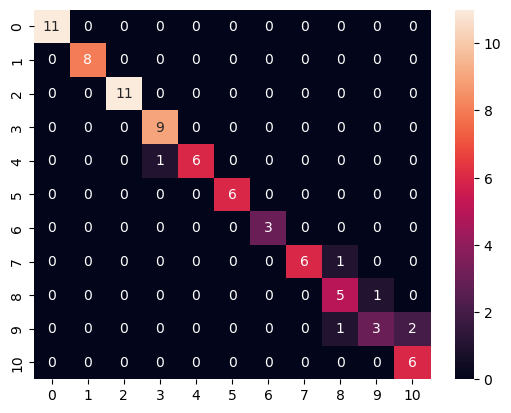

In [104]:
# find best hyper parameters
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

param_grid = {'C':[0.1, 1, 10, 100, 1000], 'kernel':['poly']}

grid = GridSearchCV(SVC(random_state = 42), param_grid, verbose = 4)
grid.fit(X_train, y_train)

# Find the best parameters for the model
grid.best_params_
grid.best_estimator_

# Predictions after getting best parameters
grid_predictions = grid.predict(X_test)
cmG = confusion_matrix(y_test, grid_predictions)

sns.heatmap(cmG, annot=True)
print(classification_report(y_test, grid_predictions))

print(grid.best_params_,grid.best_estimator_)

Considering the accuracy of SVM classification using kernel='poly'. According to the above GridSearch CV, the optimal value for C is 1000. This is an extremely high value. 

In [105]:
# Create an object svmModel using SVC()
svmModel = SVC(kernel = 'rbf',C = 100, gamma = 0.1)

# Train the model by calling fit()
svmModel.fit(X_train,y_train)

# Store the predicted values to y_pred
Y_pred = svmModel.predict(X_test)

# Display accuracy 
print('Accuracy in SVC:', accuracy_score(y_test, y_pred))

Accuracy in SVC: 0.85


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.719 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.810 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.762 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.810 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.219 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.222 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.190 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.206 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.222 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.094 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

              precision    recall  f1-score   support

        2005       1.00      1.00      1.00        11
        2006       1.00      1.00      1.00         8
        2007       1.00      1.00      1.00        11
        2008       0.90      1.00      0.95         9
        2009       1.00      0.86      0.92         7
        2010       1.00      1.00      1.00         6
        2011       1.00      1.00      1.00         3
        2012       1.00      0.86      0.92         7
        2013       0.75      1.00      0.86         6
        2014       1.00      0.83      0.91         6
        2015       1.00      1.00      1.00         6

    accuracy                           0.96        80
   macro avg       0.97      0.96      0.96        80
weighted avg       0.97      0.96      0.96        80

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'} SVC(C=1000, gamma=1, random_state=42)


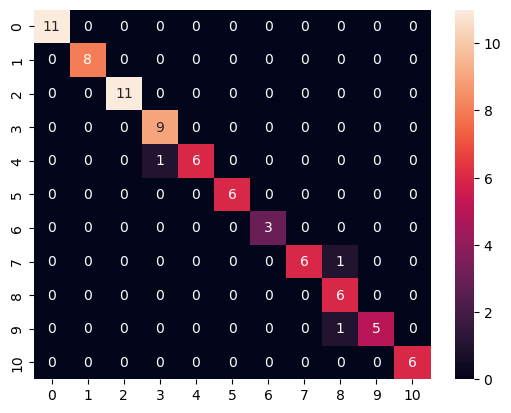

In [106]:
# Hyper parameter tuning.
param_grid = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001], 'kernel':['rbf']}

grid = GridSearchCV(SVC(random_state = 42), param_grid, verbose = 4)
grid.fit(X_train, y_train)

# Find the best parameters for the model
grid.best_params_
grid.best_estimator_

# Predictions after getting best parameters
grid_predictions = grid.predict(X_test)
cmG = confusion_matrix(y_test, grid_predictions)

sns.heatmap(cmG, annot=True)
print(classification_report(y_test, grid_predictions))

print(grid.best_params_,grid.best_estimator_)

Considering the accuracy of SVM classification using kernel='rbf'. According to the above GridSearch CV, the optimal value for C is 1000 and gamma =1 . This is an extremely high value for C, the same as that found when using the poly kernel.

In [107]:
##Cross validation
from sklearn.model_selection import cross_val_score
svm_classifier = SVC(kernel='poly')
cross_val_score(svm_classifier, merged.iloc[:, [2, 3]].values, merged.iloc[:, 0].values, scoring='accuracy', cv=30).mean()

0.8445054945054945

In [108]:
##Cross validation
from sklearn.model_selection import cross_val_score
svm_classifier = SVC(kernel='rbf')
cross_val_score(svm_classifier, merged.iloc[:, [2, 3]].values, merged.iloc[:, 0].values, scoring='accuracy', cv=30).mean()

0.6146520146520146

## Regression

### Linear

In [109]:
# Create a class 'LinearRegressionGD'
class LinearRegressionGD(object):
    
    def __init__(self, eta = 0.001, n_iter = 20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [110]:
#Specify X and y.
X = merged[['Year']].values
y = merged[['Construction_Cost_Index']].values

In [111]:
X.shape, y.shape
#Look at the shape of the X and y variables. 

((396, 1), (396, 1))

In [112]:
# Import the StandardScaler library for normalization 
from sklearn.preprocessing import StandardScaler

# Initialise using StandardScaler 
sc_x = StandardScaler()
sc_y = StandardScaler()

# Train the objects using the function fit_transform()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

In [113]:
# Reshape the (396, 1) to (396,) array for Machine Learning model
y_std = np.reshape(y_std, 396)

# Display the number of rows and columns
X_std.shape, y_std.shape

((396, 1), (396,))

In [114]:
# Initialise previously created object (lr)
lr = LinearRegressionGD()

# Train the model by using fit() fucntion
lr.fit(X_std, y_std)

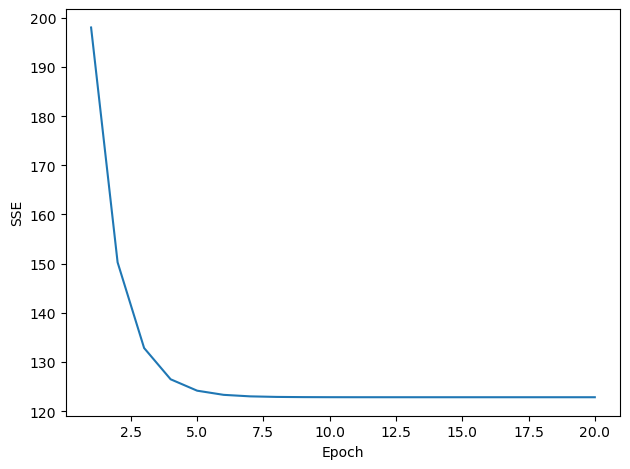

In [115]:
# Draw a plot using linear regression iterations and cost
plt.plot(range(1, lr.n_iter + 1), lr.cost_)
plt.ylabel('SSE')           
plt.xlabel('Epoch')          
                            
plt.tight_layout()
plt.show()

Epoch refers to the number of times the algorithm runs the full training dataset. As can be seen from the above graph, the sum of square errors decreases as the Epoch increases.

In [116]:
# Construct Linear Regression plot
def lin_regplot(X, y, model):
    plt.scatter(X, y, c = 'blue')
    plt.plot(X, model.predict(X), color = 'red', linewidth = 2)    
    return

In [117]:
# import LinearRegression from sklearn library
from sklearn.linear_model import LinearRegression

# Initialise an object named as 'slr' by calling a method LinearRegression()
slr = LinearRegression()

# Train the model
slr.fit(X, y)

# Predict the results
y_pred = slr.predict(X)

# Display the Slope and Intercept values
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 1.287
Intercept: -2384.838


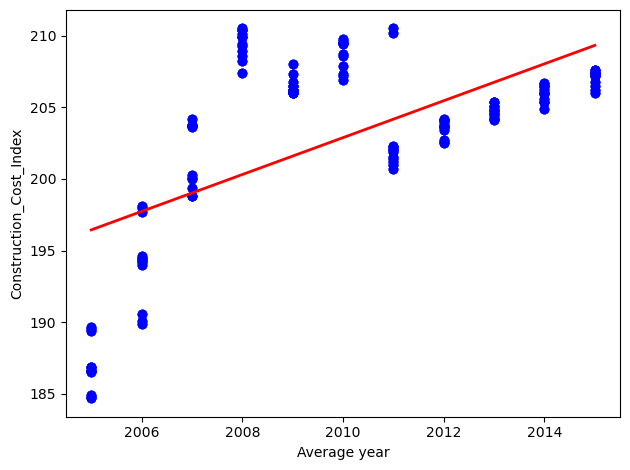

In [118]:
# Display the regression plot using lin_regplot() method
lin_regplot(X, y, slr)
plt.xlabel('Average year')
plt.ylabel('Construction_Cost_Index')
plt.tight_layout()
plt.show()

In [119]:
# Initialise an object slr by calling a method named as 'LinearRegression()'
slr = LinearRegression()

X_train, X_test, y2_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = np.array(X_train).reshape(-1, 1)

# Trian the model
slr.fit(X_train, y2_train)

# Predict the results 
y2_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

# Display the values of y_train_pred and y_test_pred
print(y2_train_pred, '\t', y_test_pred)

[[207.78667089]
 [201.71718413]
 [198.07549207]
 [204.14497883]
 [204.14497883]
 [207.78667089]
 [209.00056825]
 [204.14497883]
 [204.14497883]
 [200.50328678]
 [209.00056825]
 [201.71718413]
 [205.35887619]
 [209.00056825]
 [205.35887619]
 [206.57277354]
 [199.28938942]
 [199.28938942]
 [207.78667089]
 [196.86159472]
 [198.07549207]
 [201.71718413]
 [196.86159472]
 [196.86159472]
 [206.57277354]
 [207.78667089]
 [207.78667089]
 [200.50328678]
 [202.93108148]
 [206.57277354]
 [209.00056825]
 [206.57277354]
 [198.07549207]
 [199.28938942]
 [205.35887619]
 [204.14497883]
 [209.00056825]
 [201.71718413]
 [200.50328678]
 [196.86159472]
 [201.71718413]
 [196.86159472]
 [200.50328678]
 [207.78667089]
 [201.71718413]
 [204.14497883]
 [202.93108148]
 [209.00056825]
 [204.14497883]
 [209.00056825]
 [204.14497883]
 [209.00056825]
 [200.50328678]
 [207.78667089]
 [206.57277354]
 [200.50328678]
 [209.00056825]
 [206.57277354]
 [198.07549207]
 [200.50328678]
 [206.57277354]
 [201.71718413]
 [202.93

In [120]:
# Calculate r2 and mean squared error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Display the MSE and r2 values
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y2_train, y2_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y2_train, y2_train_pred), r2_score(y_test, y_test_pred)))

MSE train: 25.428, test: 33.885
R^2 train: 0.361, test: 0.413


#### Refrerence
Chapter 10,  Predicting Continuous Target Variables with Regression Analysis, Python Machine Learning Second Edition, Sebastian Raschka, Vahid Mirjalili, Copyright © 2017 Packt Publishing.
Machine Learning 2023 - Tutorial 3

### RANSAC Regression

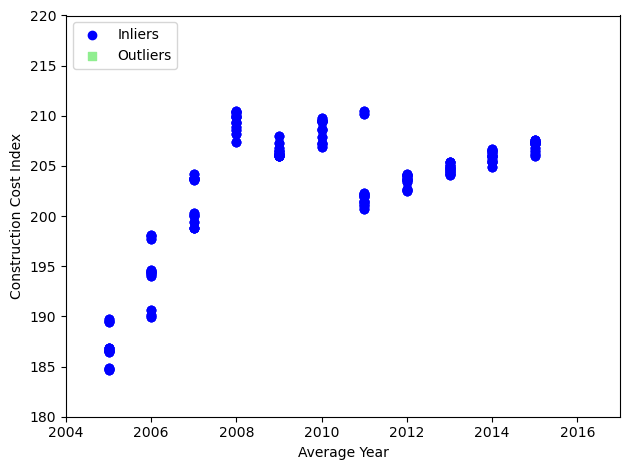

In [121]:
# import RANSACRegressor library
from sklearn.linear_model import RANSACRegressor

# Initialise an object by calling RANSACRegressor() function
ransac = RANSACRegressor(LinearRegression(), 
                         max_trials = 100, 
                         min_samples = 10,                          
                         residual_threshold = 20.0, 
                         random_state = 0)
ransac.fit(X, y)

# Store the values for inliers and outliers
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask], c = 'blue', marker = 'o', label = 'Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c = 'lightgreen', marker = 's', label = 'Outliers')
plt.plot(line_X, line_y_ransac, color = 'red')   
plt.xlabel('Average Year')
plt.ylabel('Construction Cost Index')
plt.xlim(2004,2017)
plt.ylim(180,220)
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

It appears all values are inliers. This indicates possible overfitting of the data.RANSAC is generally said to be a good model when dealing with outliers.

### Ridge Regresion 

In [122]:
# import train_test_split from the library sklearn
from sklearn.model_selection import train_test_split

# Declare variables named as 'X' and 'y'
#y = target variable.

X = merged["Year"].values.reshape(-1,1)
y = merged['Construction_Cost_Index'].values                    

# Split the data into 80% and 20% by using a parameter test_size = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Display the shape of rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((396, 1), (396,), (316, 1), (80, 1), (316,), (80,))

In [123]:
# Initialise slr by calling a method named as 'LinearRegression()'
slr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = np.array(X_train).reshape(-1, 1)

# Trian the model
slr.fit(X_train, y_train)

# Predict the results 
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

# Display the values of y_train_pred and y_test_pred
print(y2_train_pred, '\t', y_test_pred)

[[207.78667089]
 [201.71718413]
 [198.07549207]
 [204.14497883]
 [204.14497883]
 [207.78667089]
 [209.00056825]
 [204.14497883]
 [204.14497883]
 [200.50328678]
 [209.00056825]
 [201.71718413]
 [205.35887619]
 [209.00056825]
 [205.35887619]
 [206.57277354]
 [199.28938942]
 [199.28938942]
 [207.78667089]
 [196.86159472]
 [198.07549207]
 [201.71718413]
 [196.86159472]
 [196.86159472]
 [206.57277354]
 [207.78667089]
 [207.78667089]
 [200.50328678]
 [202.93108148]
 [206.57277354]
 [209.00056825]
 [206.57277354]
 [198.07549207]
 [199.28938942]
 [205.35887619]
 [204.14497883]
 [209.00056825]
 [201.71718413]
 [200.50328678]
 [196.86159472]
 [201.71718413]
 [196.86159472]
 [200.50328678]
 [207.78667089]
 [201.71718413]
 [204.14497883]
 [202.93108148]
 [209.00056825]
 [204.14497883]
 [209.00056825]
 [204.14497883]
 [209.00056825]
 [200.50328678]
 [207.78667089]
 [206.57277354]
 [200.50328678]
 [209.00056825]
 [206.57277354]
 [198.07549207]
 [200.50328678]
 [206.57277354]
 [201.71718413]
 [202.93

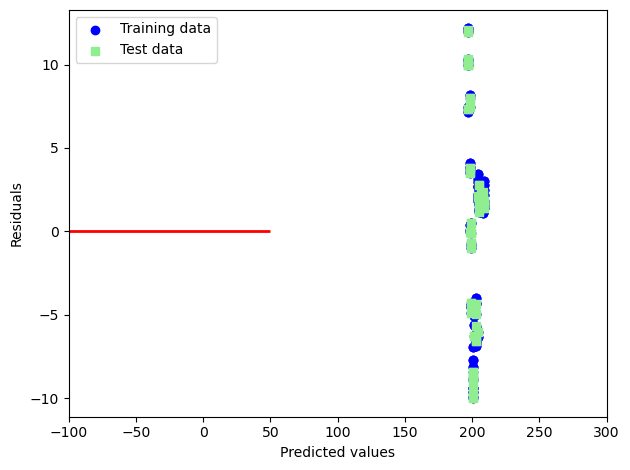

In [124]:
# Display the graph for the training and testing of the data
plt.scatter(y_train_pred,  y_train_pred - y_train, c = 'blue', marker = 'o', label = 'Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test, c = 'lightgreen', marker = 's', label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -100, xmax = 50, lw = 2, color = 'red')
plt.xlim([-100, 300])
plt.tight_layout()

plt.show()

In [125]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Using GridSearch for parameter optimization
ridgeregr = GridSearchCV(Ridge(),
                    param_grid={
                        'alpha': [0.01, 0.1, 1, 10]
                    }, verbose=1)

ridgeregr.fit(X_train, y_train)

ridge = ridgeregr.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [126]:
from sklearn.metrics import mean_squared_error

# Making predictions here
y_preds_train = ridge.predict(X_train)
y_preds_test_ridge = ridge.predict(X_test)

print("R-squared of the model in training set is: {}".format(ridge.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(mean_squared_error(y_test, y_preds_test_ridge)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test_ridge) / y_test)) * 100))

R-squared of the model in training set is: 0.36050498544963316
-----Test set statistics-----
R-squared of the model in test set is: 0.4121646170259582
Root mean squared error of the prediction is: 5.823571333464566
Mean absolute percentage error of the prediction is: 2.3601089464219855


In [127]:
from sklearn.model_selection import RandomizedSearchCV

# define the parameter grid for random search
param_grid = {'alpha': [0.01, 0.1, 1, 10]}

# create a Lasso object
ridge2 = Lasso()

# create a RandomizedSearchCV object
ridgeregr2 = RandomizedSearchCV(estimator=ridge, 
                        param_distributions=param_grid,
                        n_iter=10, # number of iterations
                        cv=8, # cross-validation
                        random_state=42)

# fit the RandomizedSearchCV object on the training data
ridgeregr2.fit(X_train, y_train)

# get the best estimator from the RandomizedSearchCV object
ridge2 = ridgeregr2.best_estimator_

In [128]:
from sklearn.metrics import mean_squared_error

# Making predictions here
y_preds_train = ridge2.predict(X_train)
y_preds_test_ridge = ridge2.predict(X_test)

print("R-squared of the model in training set is: {}".format(ridge2.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge2.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(mean_squared_error(y_test, y_preds_test_ridge)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test_ridge) / y_test)) * 100))

R-squared of the model in training set is: 0.36050498544963316
-----Test set statistics-----
R-squared of the model in test set is: 0.4121646170259582
Root mean squared error of the prediction is: 5.823571333464566
Mean absolute percentage error of the prediction is: 2.3601089464219855


In [129]:
# alpha = 1 is a parameter using a fit() method
ridge1 = Ridge(alpha = 1).fit(X_train, y_train)

# Display the score values for Ridge function
print("Training set score: {:.2f}".format(ridge1.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge1.score(X_test, y_test)))

Training set score: 0.36
Test set score: 0.41


High alpha values can cause overfitting on the training set. Having trialled a number of alpha values, the alpha value needs to be significantly large to have an effect on the score. An alpha value of 1 was chosen as the higher alpha values actually decrease the score. The test score is slightly higher than the training score. The training score demonstrates the models ability to fit the data it was trained on, low scores may be an indication of underfitting.The fact that the score does not change unless there is a significant change to the alpha value also indicates an under/overfitting issue with the model.

### Lasso Regression 

In [130]:
# using GridSearch for parameter optimization
lassoregr = GridSearchCV(Lasso(),
                    param_grid={
                        'alpha': [0.01, 0.1, 1, 10]
                    }, verbose=1)

lassoregr.fit(X_train, y_train)

lasso = lassoregr.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [131]:
# Making predictions 
y_preds_train = lasso.predict(X_train)
y_preds_test_lasso = lasso.predict(X_test)

print("R-squared of the model in training set is: {}".format(lasso.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso.score(X_test, y_test)))
print("Mean squared error of the prediction is: {}".format(mean_squared_error(y_test, y_preds_test_lasso)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test_lasso) / y_test)) * 100))

R-squared of the model in training set is: 0.36048292351757927
-----Test set statistics-----
R-squared of the model in test set is: 0.4113377834962374
Mean squared error of the prediction is: 33.96168557761273
Mean absolute percentage error of the prediction is: 2.3586493242643116


### Elastic Net Regression

In [132]:
# Load library for the ElasticNet
from sklearn.linear_model import ElasticNet

# Train the model
e_net = ElasticNet(alpha = 5)

e_net.fit(X_train, y_train)

# Calculate the prediction and mean square error
y_pred_elastic = e_net.predict(X_test)

# Calculate the mean_square_error
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)

# Display the mean square error
print("Mean Squared Error on test set", mean_squared_error)

Mean Squared Error on test set 39.51687234377015


In [133]:
print(e_net.coef_, e_net.intercept_)

[0.76127196] -1327.1453390857691


In [134]:
e_net.predict(X_train)[:30]

array([206.0563814 , 202.25002162, 199.96620575, 203.77256553,
       203.77256553, 206.0563814 , 206.81765336, 203.77256553,
       203.77256553, 201.48874966, 206.81765336, 202.25002162,
       204.53383749, 206.81765336, 204.53383749, 205.29510945,
       200.72747771, 200.72747771, 206.0563814 , 199.20493379,
       199.96620575, 202.25002162, 199.20493379, 199.20493379,
       205.29510945, 206.0563814 , 206.0563814 , 201.48874966,
       203.01129358, 205.29510945])

In [135]:
e_net.predict(X_test)[:30]

array([200.72747771, 204.53383749, 203.77256553, 199.96620575,
       206.81765336, 204.53383749, 199.96620575, 206.0563814 ,
       202.25002162, 201.48874966, 199.20493379, 203.01129358,
       205.29510945, 202.25002162, 206.0563814 , 206.81765336,
       201.48874966, 206.81765336, 203.01129358, 206.0563814 ,
       199.20493379, 206.81765336, 205.29510945, 199.20493379,
       201.48874966, 201.48874966, 200.72747771, 199.20493379,
       200.72747771, 200.72747771])

In [136]:
r2_score(y_test,y_pred_elastic)

0.3150490245833334

In [137]:
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV

#Tuning the model
e_net_cv_model = ElasticNetCV(cv = 30).fit(X_train,y_train)

e_net_cv_model.alpha_

0.023617801634353477

In [138]:
e_net_cv_model.intercept_

-2231.606909131745

In [139]:
# create the final model according to optimum alpha.

e_net_tuned = ElasticNet(alpha = e_net_cv_model.alpha_).fit(X_train,y_train)

# Let's now calculate the error for the test set using this final model.

y_pred = e_net_tuned.predict(X_test)

np.sqrt(mean_squared_error)

6.286244693278345

We can see the model has a large mean square error value. This shows the predicted values may differ significantly from the values found within the test set. Again this is an indication of potential overfitting.
Ref: https://medium.com/mlearning-ai/elasticnet-regression-fundamentals-and-modeling-in-python-8668f3c2e39e

### Decision Tree Regression

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [141]:
from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [142]:
y_pred_DT = DTregressor.predict(X_test)

In [143]:
print("R-squared of the model in training set is: {}".format(DTregressor.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(DTregressor.score(X_test, y_test)))

R-squared of the model in training set is: 0.9331780409976577
-----Test set statistics-----
R-squared of the model in test set is: 0.9526431379976659


In [144]:
# Store the feature or attribute values in X and y
X = merged[['Year']].values
y = merged['Construction_Cost_Index'].values

# Initialise an object by calling a method DecisionTreeRegressor()
tree = DecisionTreeRegressor(max_depth = 5)
tree.fit(X, y)

#Colapse into one dimension
sort_idx=X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('Year')
plt.ylabel('Construction_Cost_Index')
plt.xlim([2000, 2020])
plt.show()

In [145]:
r2_score

<function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)>

In [146]:
tree = DecisionTreeRegressor(max_depth = 3)
tree.fit(X, y)

# Create a GridSearchCV object
grid_tree = GridSearchCV(estimator=tree, param_grid={'max_depth':[2,3,4,5,6,7,8]}, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search object on the training data
grid_tree.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_tree.best_params_
print("Best hyperparameters:", best_params)

# Get the best score
best_score = grid_tree.best_score_
print("Best score:", -best_score)

Best hyperparameters: {'max_depth': 6}
Best score: 3.060420040015389


## PCA & Clustering 

In [147]:
#suppress the warnings
import warnings
warnings.filterwarnings('ignore') 

In [148]:
#Define x and y 
X = merged[['Construction_Cost_Index','Property_Price_Index']]
y = merged['Year']

In [149]:
# Splitting the X and Y into the Training set and Testing set
from sklearn.model_selection import train_test_split

# Split into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [150]:
# preprocessing
from sklearn.preprocessing import StandardScaler

# Create and initialise an object (sc) by calling StandardScaler()
sc = StandardScaler()

# Train the model by calling a method fit_transform()
X_train = sc.fit_transform(X_train)

# Transform the data into standised form
X_test = sc.transform(X_test)

In [151]:
# Applying PCA to training and testing set of X 
from sklearn.decomposition import PCA

# Create and initialise an object (pca) by calling a method PCA
pca = PCA(n_components = 2)

# Transform the data 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
# Store 'explained variance'
explained_variance = pca.explained_variance_ratio_

print(explained_variance)

[0.65677535 0.34322465]


Ref - https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

### Displaying PCA Components

In [152]:
plt.bar(range(1,len(pca.explained_variance_ ) + 1), pca.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1, len(pca.explained_variance_ ) + 1), pca.explained_variance_,
         c = 'black',
         label = "Cumulative Explained Variance")
plt.legend(loc = 'best')

Cumalitive variance shows the variance for each of the principle components.

## PCA 

In [153]:
# Importing standardscalar module 
from sklearn.preprocessing import StandardScaler
  
# Preprocess the Month column as it is a string
merged['Month'] = pd.Categorical(merged['Month'])
merged['Month'] = merged['Month'].cat.codes

# Standardizing numerical columns
# Remove the string column
numeric_columns = merged.drop('Month', axis=1)  
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_columns)

# Perform PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(scaled_data)
    
x_pca.shape

(396, 2)

In [154]:
# giving a larger plot
plt.figure(figsize =(8, 6))
  
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = numeric_columns["Year"], cmap ="plasma")
  
# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

In [155]:
# Display components
pca.components_, pca.explained_variance_ratio_

(array([[-0.6510423 , -0.49657554,  0.57407025],
        [ 0.09298828, -0.80279118, -0.58896477]]),
 array([0.72291549, 0.23319922]))

## k-means Clustering

In [156]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X, y = make_blobs(random_state = 1)

# build the clustering model
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [157]:
!pip install plotly

In [158]:
import time # for adding time delays

import matplotlib.pyplot as plt # for data visualization
import plotly.graph_objects as go # for data visualization

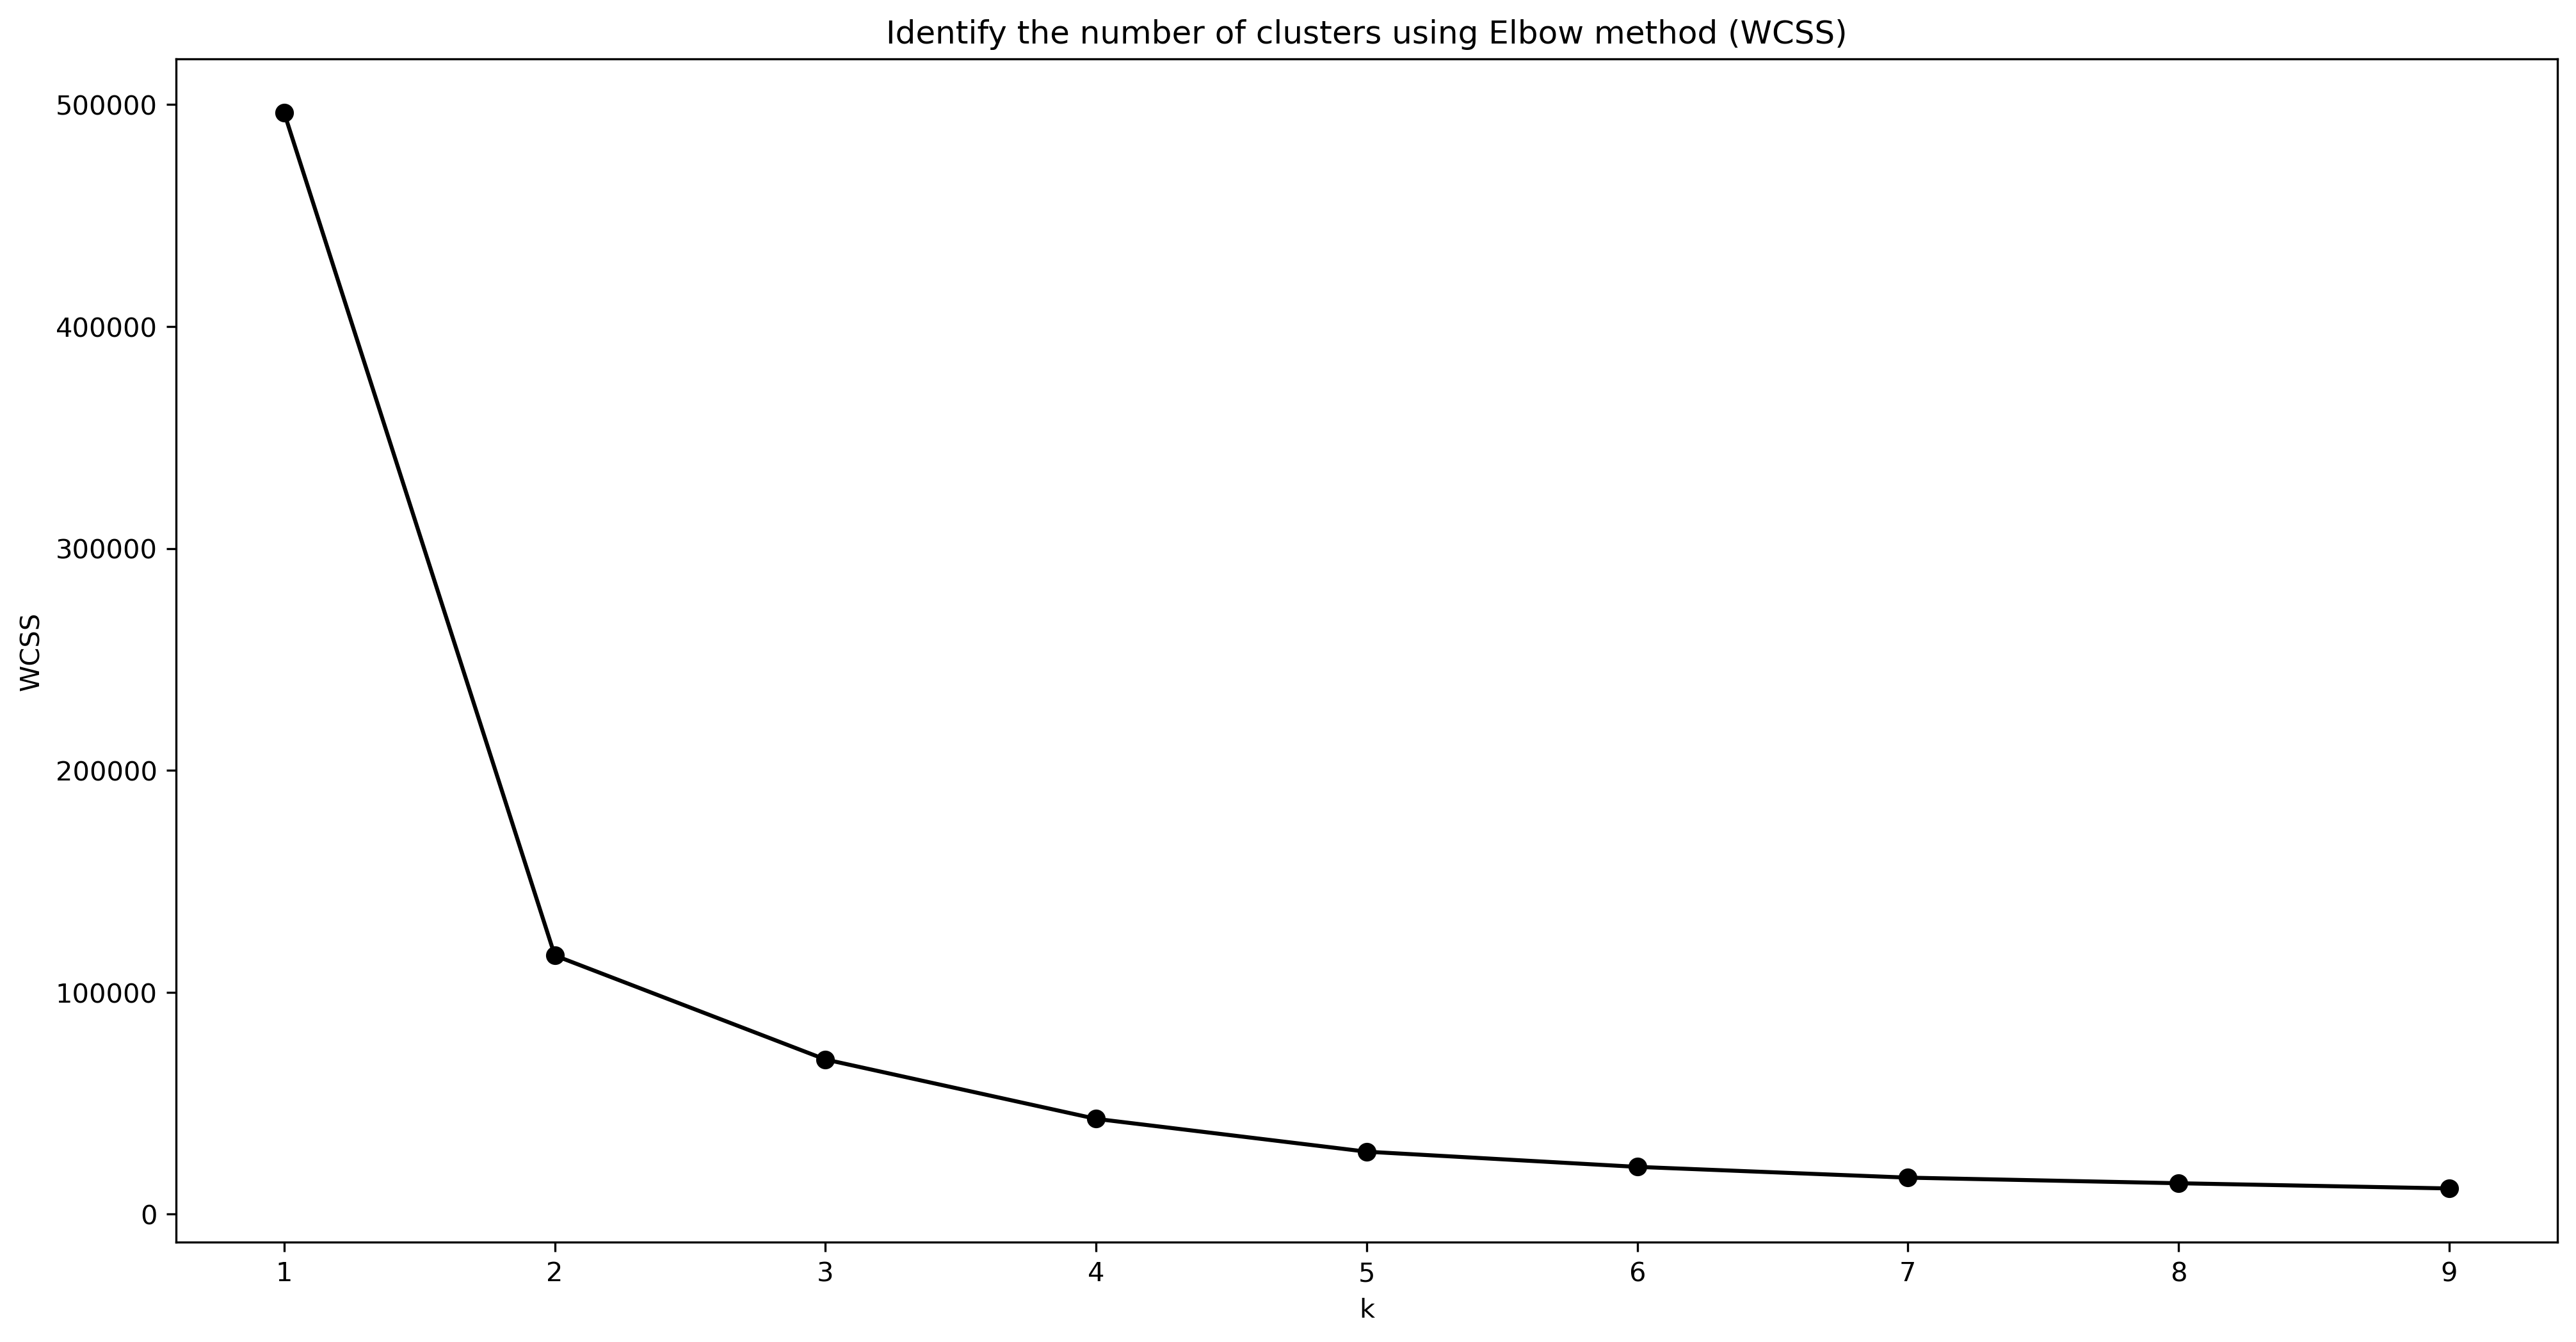

In [159]:
# Identify the number of clusters using Elbow method (WCSS)
WCSS = []
K=range(1,10)
for k in K:
    kmod = KMeans(n_clusters=k)
    kmod.fit(merged[['Construction_Cost_Index','Property_Price_Index']])
    WCSS.append(kmod.inertia_)
    
# Plot elbow graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(K, WCSS, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Identify the number of clusters using Elbow method (WCSS)')
plt.show()

In [160]:
# import KMeans library for clustering
from sklearn.cluster import KMeans

# Applying KMeans to the dataset/ Creating the kmeans classifier
kmeans = KMeans(n_clusters = 2, max_iter = 300, n_init = 10, random_state = 42)

# n_initint, default = 10, Number of time the k-means algorithm will be run with different centroid seeds. 
# The final results will be the best output of n_init consecutive runs in terms of inertia.
y_kmeans = kmeans.fit_predict(merged)

print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [161]:
 # lowest SSE value
kmeans.inertia_

122444.57611016951

In [162]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[2012.20338983,    5.58050847,  205.5559322 ,   91.05338983],
       [2006.75      ,    5.38125   ,  198.945     ,  153.81125   ]])

In [163]:
# number of iterations required to converge
kmeans.n_iter_

4

In [164]:
# Select data for clustering model
X = merged[['Construction_Cost_Index','Property_Price_Index']]

# Set the model and its parameters - 2 clusters
model2 = KMeans(n_clusters=3,
                init='k-means++', # Smart initialization of centroids, alternative option 'random'
                n_init=10, # Number of time the k-means algorithm will be run with different centroid seeds, default=10
                max_iter=100, # maximum number of iterations to run default=300
               )

# Set the model and its parameters - 3 clusters
model3 = KMeans(n_clusters=4,
                init='k-means++', # Smart initialization of centroids, alternative option 'random'
                n_init=10, # Number of time the k-means algorithm will be run with different centroid seeds, default=10
                max_iter=100, # maximum number of iterations to run default=300
               )

# Fit the model (2 and 3 clusters)
clust2 = model2.fit(X)
clust3 = model3.fit(X)

# Print model summary
print('*************** 2 Cluster Model ***************')
print('Cluster centers: ', clust2.cluster_centers_)
print('Inertia (WCSS): ', clust2.inertia_)
print('No. of iterations: ', clust2.n_iter_)
print()

print('*************** 3 Cluster Model ***************')
print('Cluster centers: ', clust3.cluster_centers_)
print('Inertia (WCSS): ', clust3.inertia_)
print('No. of iterations: ', clust3.n_iter_)

*************** 2 Cluster Model ***************
Cluster centers:  [[200.65514019 164.15514019]
 [205.36287129  87.16287129]
 [199.87356322 125.59655172]]
Inertia (WCSS):  69716.91057602086
No. of iterations:  8

*************** 3 Cluster Model ***************
Cluster centers:  [[207.17948718 102.58888889]
 [197.35373134 134.39701493]
 [203.88434783  78.2826087 ]
 [200.34020619 165.85979381]]
Inertia (WCSS):  42982.37573016642
No. of iterations:  8


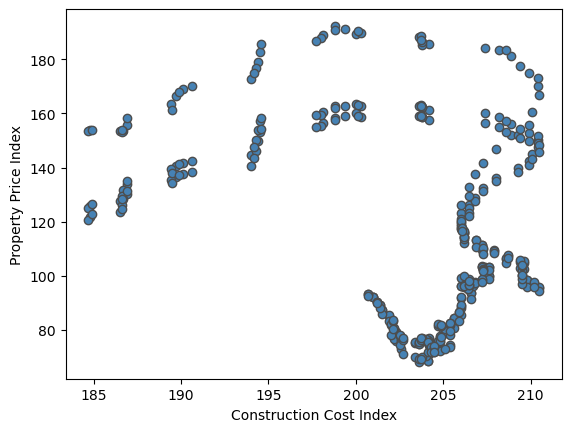

In [165]:
plt.scatter(merged['Construction_Cost_Index'], merged['Property_Price_Index'],
           color='SteelBlue', edgecolors='0.3');
plt.xlabel('Construction Cost Index')
plt.ylabel('Property Price Index')
plt.subplots_adjust(wspace=0.25);

Text(0, 0.5, 'Counts')

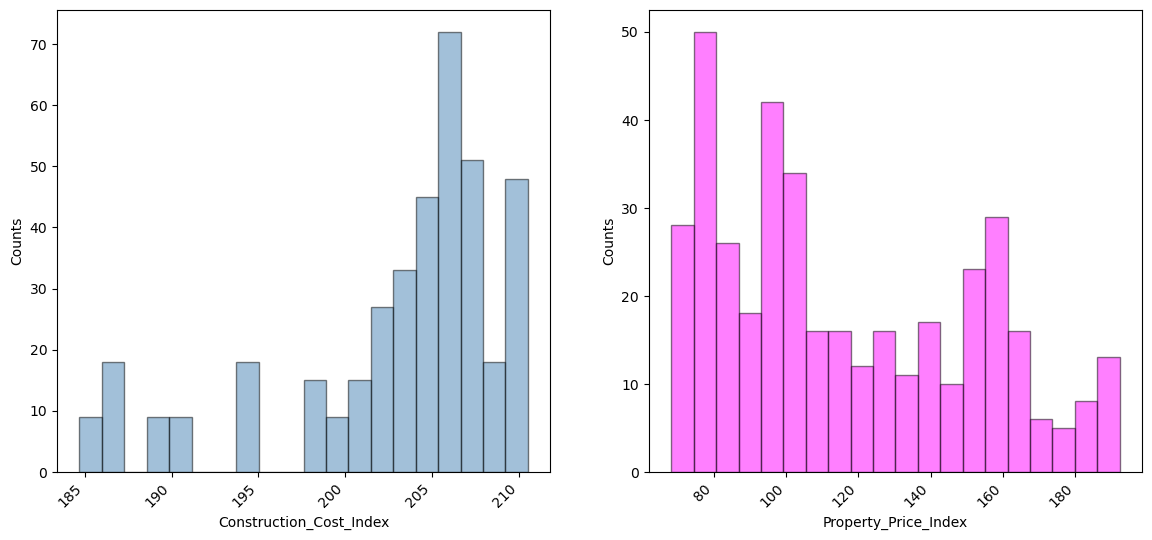

In [166]:
plt.subplots(12, figsize=(14, 6))
plt.subplot(121)
plt.hist(merged['Construction_Cost_Index'], bins=20, color='SteelBlue', alpha=0.5, histtype='bar', ec='black')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Construction_Cost_Index')
plt.ylabel('Counts')

plt.subplot(122)
plt.hist(merged['Property_Price_Index'], bins=20, color='magenta', alpha=0.5, histtype='bar', ec='black')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Property_Price_Index')
plt.ylabel('Counts')

#plt.subplot(123)
#circle_sizes = 200 * merged["Year"]
#plt.scatter(merged['Construction_Cost_Index'], merged['Property_Price_Index'],s=100 * merged['Year'] / merged['Year'].max(),
            #color='SteelBlue', edgecolors='0.3')
#plt.xlabel('Absolute Latitude (Degrees, \'DFE\')')
#plt.ylabel('Suicide Rate (per 100\')')
#plt.subplots_adjust(wspace=0.25)

In [167]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette scores
silhouette_avg2 = silhouette_score(X, clust2.labels_)
silhouette_avg3 = silhouette_score(X, clust3.labels_)

print('*************** Silhouette Scores ***************')
print('2 Cluster Model: ', silhouette_avg2)
print('3 Cluster Model: ', silhouette_avg3)

*************** Silhouette Scores ***************
2 Cluster Model:  0.5462079132740102
3 Cluster Model:  0.5448934073506326


## Gaussian Mixture Model

This clustering model uses a multivariate probability distribution along with a Gaussian probability distribution.

In [168]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot

Text(0.5, 0, 'n_components')

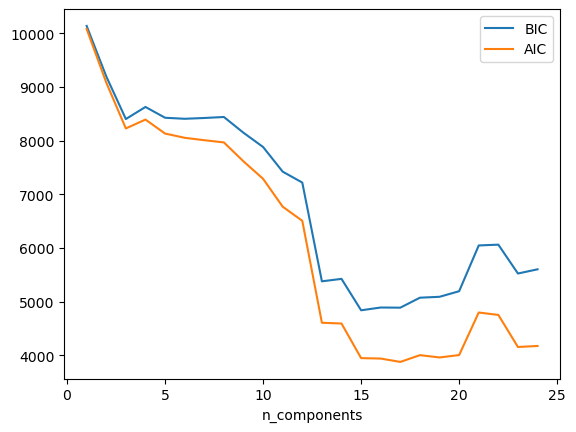

In [169]:
n_components = np.arange(1, 25)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(merged)
          for n in n_components]

plt.plot(n_components, [m.bic(merged) for m in models], label='BIC')
plt.plot(n_components, [m.aic(merged) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

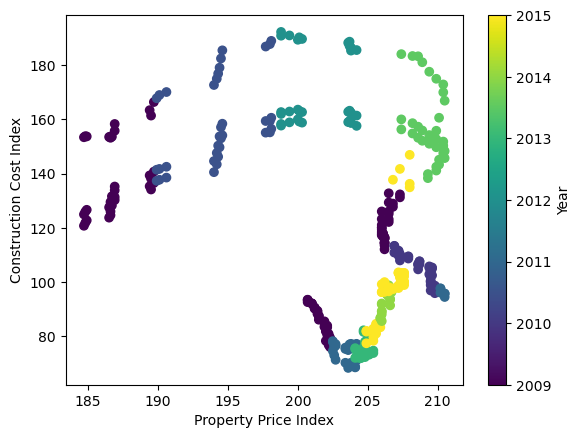

In [170]:
# define the model
model = GaussianMixture(n_components=3)

# fit the model
model.fit(merged[["Construction_Cost_Index","Property_Price_Index"]].values)

# assign a cluster to each example
yhat = model.predict(merged[["Construction_Cost_Index","Property_Price_Index"]].values)

# retrieve unique clusters
clusters = unique(yhat)

# create scatter plot for samples from each cluster
for cluster in clusters:

# get row indexes for samples with this cluster
 row_ix = where(yhat == cluster)
    
# create scatter of these samples
 plt.scatter(merged.iloc[row_ix]['Construction_Cost_Index'], merged.iloc[row_ix]['Property_Price_Index'], c=merged.iloc[row_ix]['Year'], cmap='viridis')

# show the plot
cbar = plt.colorbar()
cbar.set_label('Year')
plt.xlabel('Property Price Index')
plt.ylabel('Construction Cost Index')
plt.show()

In [171]:
silhouette_avg = silhouette_score(merged[["Construction_Cost_Index", "Property_Price_Index"]].values, yhat)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5559078697887666


Ref - https://machinelearningmastery.com/clustering-algorithms-with-python/ ref-https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html

## DBSCAN Clustering

DBASCAN stands for density based spatial clustering of applications with noise. Works by computing nearest neighbour graphs to find clusters and outliers. The main different between this and knn is the shape of the clusters. DBSCAN uses arbitrary shaped clusters and knn uses spherical shaped clusters.

In [172]:
from sklearn.cluster import DBSCAN

In [173]:
X_train = merged[["Construction_Cost_Index","Property_Price_Index","Year"]]

In [174]:
clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_train)
DBSCAN_dataset = X_train.copy()
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_ 

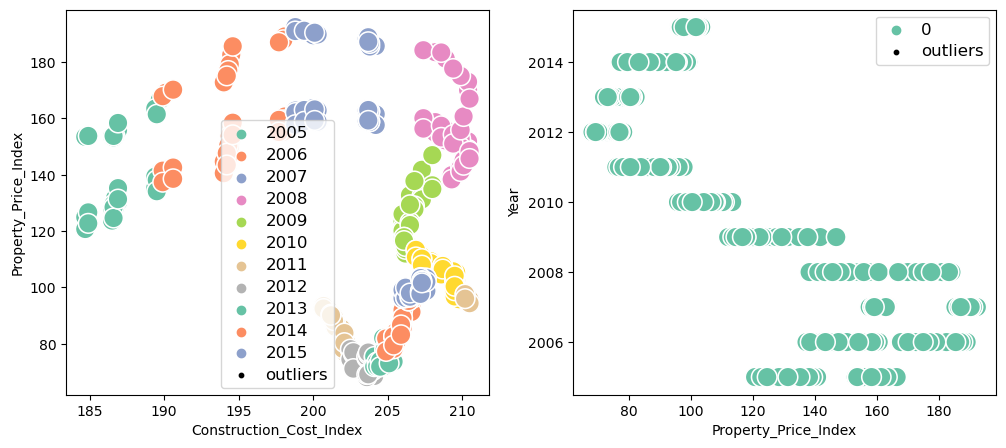

In [175]:
outliers = DBSCAN_dataset[DBSCAN_dataset['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot("Construction_Cost_Index","Property_Price_Index","Year",

                data=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1],

                hue='Cluster', ax=axes[0], palette='Set2', legend='full', s=200)

sns.scatterplot("Property_Price_Index","Year",

                data=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1],

                hue='Cluster', palette='Set2', ax=axes[1], legend='full', s=200)

axes[0].scatter(outliers['Construction_Cost_Index'], outliers['Year'], s=10, label='outliers', c="k")

axes[1].scatter(outliers['Property_Price_Index'], outliers['Year'], s=10, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='12')
plt.setp(axes[1].get_legend().get_texts(), fontsize='12')

plt.show()

In [176]:
from sklearn.neighbors import NearestNeighbors
# n_neighbors = 6 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
nbrs = NearestNeighbors(n_neighbors = 12).fit(merged)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(merged)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

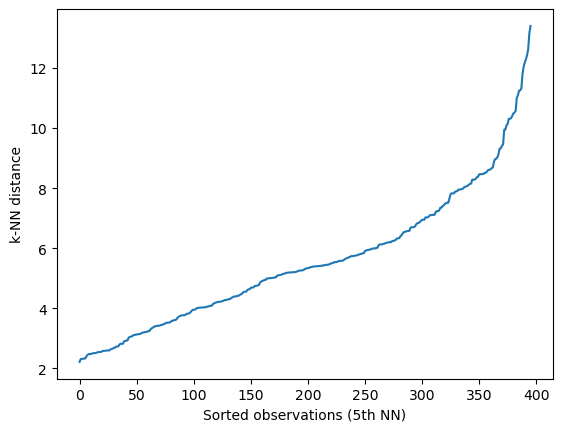

In [177]:
k_dist = sort_neigh_dist[:, 11]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (5th NN)")
plt.show()

In [178]:
from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)

11.247221879201994


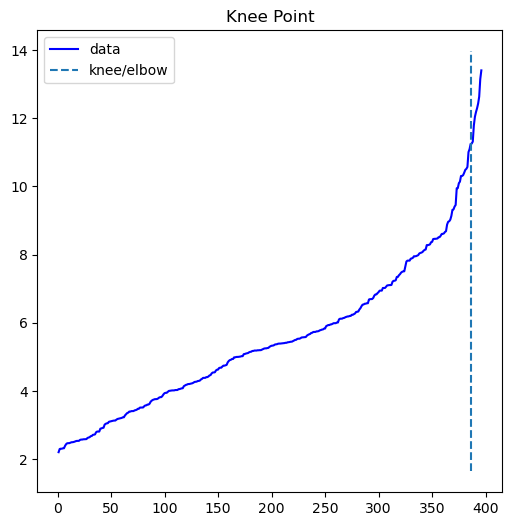

In [179]:
kneedle.plot_knee()
plt.show()

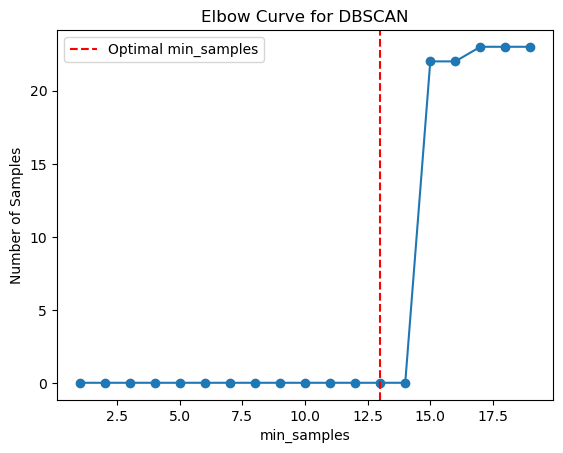

Optimal min_samples value: 13


In [180]:
min_samples_range = range(1, 20)  # Range of min_samples values to test
eps = 11.24

num_samples = []
for min_samples in min_samples_range:
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(X_train)
    unique_labels, counts = np.unique(clustering.labels_, return_counts=True)
    num_samples.append(len(X_train) - counts[0])  # Subtracting noise samples

# Calculating the second derivative of the number of samples
second_derivatives = np.gradient(np.gradient(num_samples))

# Finding the index of the elbow point
elbow_index = np.argmax(second_derivatives)

# Extracting the optimal min_samples value
optimal_min_samples = min_samples_range[elbow_index]

# Plotting the elbow curve
plt.plot(min_samples_range, num_samples, marker='o')
plt.xlabel('min_samples')
plt.ylabel('Number of Samples')
plt.title('Elbow Curve for DBSCAN')
plt.axvline(x=optimal_min_samples, color='r', linestyle='--', label='Optimal min_samples')
plt.legend()
plt.show()

print("Optimal min_samples value:", optimal_min_samples)

In [181]:
from sklearn.metrics import silhouette_samples

min_samples=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for i in min_samples:
    print("min_samples value is "+str(i))
    db=DBSCAN(eps = 8.61, min_samples =i).fit(merged)
    core_samples_mask=np.zeros_like(db.labels_,dtype=bool)
    core_samples_mask[db.core_sample_indices_]=True
    labels= db.labels_
    unique_labels = set(labels[labels != -1])
    num_clusters = len(unique_labels)
    print(set(labels))
    print("For min_samples value =",i, "Total no. of clusters are",num_clusters)

min_samples value is 1
{0}
For min_samples value = 1 Total no. of clusters are 1
min_samples value is 2
{0}
For min_samples value = 2 Total no. of clusters are 1
min_samples value is 3
{0}
For min_samples value = 3 Total no. of clusters are 1
min_samples value is 4
{0}
For min_samples value = 4 Total no. of clusters are 1
min_samples value is 5
{0}
For min_samples value = 5 Total no. of clusters are 1
min_samples value is 6
{0, 1, -1}
For min_samples value = 6 Total no. of clusters are 2
min_samples value is 7
{0, 1, -1}
For min_samples value = 7 Total no. of clusters are 2
min_samples value is 8
{0, 1, -1}
For min_samples value = 8 Total no. of clusters are 2
min_samples value is 9
{0, 1, -1}
For min_samples value = 9 Total no. of clusters are 2
min_samples value is 10
{0, 1, -1}
For min_samples value = 10 Total no. of clusters are 2
min_samples value is 11
{0, 1, -1}
For min_samples value = 11 Total no. of clusters are 2
min_samples value is 12
{0, 1, -1}
For min_samples value = 12 T

In [182]:
clusters = DBSCAN(eps =11.24, min_samples = 13).fit(merged)
# get cluster labels
clusters.labels_
# output
pd.array([0, 0, 1, ..., 1, 1, 1])

# check unique clusters
set(clusters.labels_)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1}
# -1 value represents noisy points could not assigned to any cluster

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [183]:
from collections import Counter
Counter(clusters.labels_)

Counter({0: 374, 1: 22})

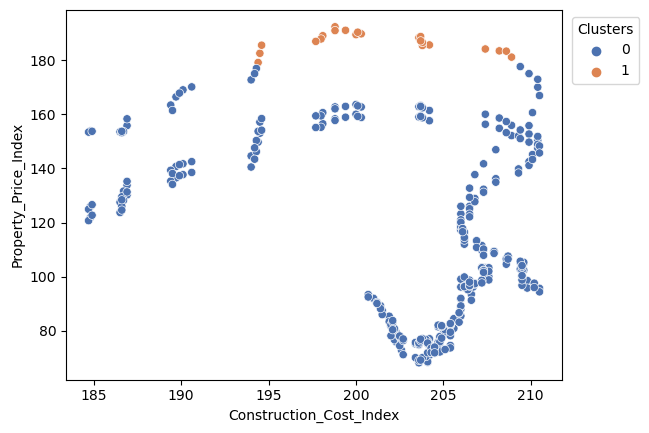

In [184]:
#Plot the clusters
p = sns.scatterplot(data = merged, x = "Construction_Cost_Index", y = "Property_Price_Index", hue = clusters.labels_, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()

In [185]:
from sklearn.metrics import silhouette_score
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_
cluster_labels = DBSCAN_dataset['Cluster']

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_train, clusters.labels_)

print("DBSCAN Silhouette Score:", silhouette_avg)

DBSCAN Silhouette Score: 0.4010240221375353


Ref - https://www.reneshbedre.com/blog/dbscan-python.html
Ref - https://www.kdnuggets.com/2022/08/implementing-dbscan-python.html#

## Time Series using df6 Index of Employment in construction (1975 - 2008)

In [186]:
df6.head()

Year  VALUE
0  1975  133.2
1  1976  128.1
2  1977  134.8
3  1978  147.0
4  1979  158.8

In [187]:
#Changeto datetime format in the form of YY.
df6['Year'] = pd.to_datetime(df6['Year'], format='%Y')

In [188]:
#Visualising the data
fig = px.line(df6, x="Year", y="VALUE", template = 'plotly_dark')
fig.show()

In [189]:
#changing to an array
df6.index = df6['Year']
del df6['Year']
print(df6.head())

            VALUE
Year             
1975-01-01  133.2
1976-01-01  128.1
1977-01-01  134.8
1978-01-01  147.0
1979-01-01  158.8


In [190]:
#Get the rolling mean and std
rolling_mean = df6.rolling(5).mean()
rolling_std = df6.rolling(5).std()

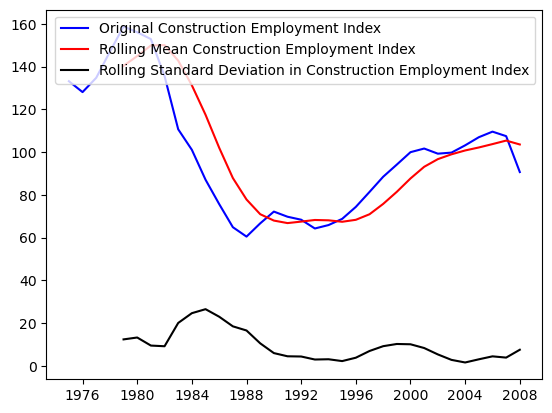

In [191]:
#Plot the values
plt.plot(df6, color="blue",label="Original Construction Employment Index")
plt.plot(rolling_mean, color="red", label="Rolling Mean Construction Employment Index")
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation in Construction Employment Index")
plt.legend(loc="best")

In [192]:
from statsmodels.tsa.stattools import adfuller

In [193]:
#Checking stationarity using the augmented dicky fuller test.
adft = adfuller(df6,autolag="AIC")

In [194]:
#To view the adft test metrics
output_df6 = pd.DataFrame({"VALUE":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df6)

       VALUE                       Metric
0  -1.969570              Test Statistics
1   0.300073                      p-value
2   1.000000             No. of lags used
3  32.000000  Number of observations used
4  -3.653520          critical value (1%)
5  -2.957219          critical value (5%)
6  -2.617588         critical value (10%)


In [195]:
#KPSS test metrics
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value > 0.05 else ""}stationary')


In [196]:
# KPSS test: stationarity around a trend
kpss_test(df6['VALUE'], regression='ct')

KPSS Statistic: 0.16934335759876523
p-value: 0.030547202001028968
num lags: 4
Critial Values:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Result: The series is stationary


ADFT makes the following assumption: H0=series is not stationary. H1=series is stationary. As the p-value is greater than 0.05, we fail to reject H0 and can say the series is stationary. This is important as time series analysis looks for stationary data for analysis. The Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test can also be used to check for stationarity. 'regression='ct'' was specified in order to turn on stationary testing around a trend. KPSS works oppositely to adft as H0= series is stationary. Therefore the KPPS test also confirms the data is stationary. Ref - https://www.machinelearningplus.com/time-series/kpss-test-for-stationarity/

In [197]:
autocorrelation_lag1 = df6['VALUE'].autocorr(lag=1)
print("One Year Lag: ", autocorrelation_lag1)

One Year Lag:  0.9563848199758804


In [198]:
autocorrelation_lag5 = df6['VALUE'].autocorr(lag=5)
print("Five Year Lag: ", autocorrelation_lag5)

autocorrelation_lag10 = df6['VALUE'].autocorr(lag=10)
print("Ten Year Lag: ", autocorrelation_lag10)

autocorrelation_lag15 = df6['VALUE'].autocorr(lag=15)
print("Fifteen Year Lag: ", autocorrelation_lag15)

Five Year Lag:  0.3892128004911992
Ten Year Lag:  -0.7320215580761199
Fifteen Year Lag:  -0.924543670172687


In [199]:
from statsmodels.tsa.seasonal import seasonal_decompose

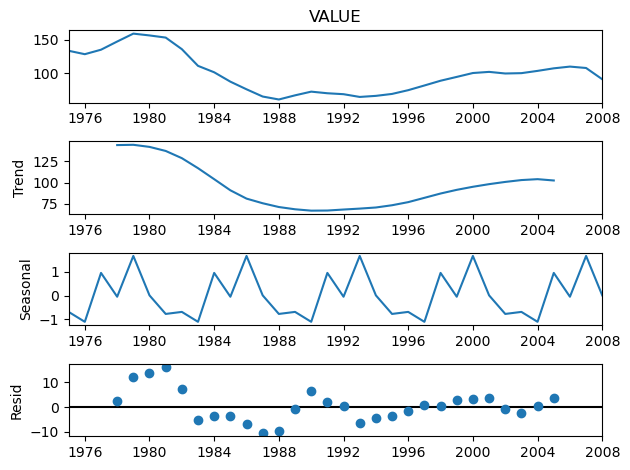

In [200]:
#Decomposition plots,Trend, seasonal, back up.
decompose = seasonal_decompose(df6['VALUE'],model='additive', period=7)
decompose.plot()
plt.show()

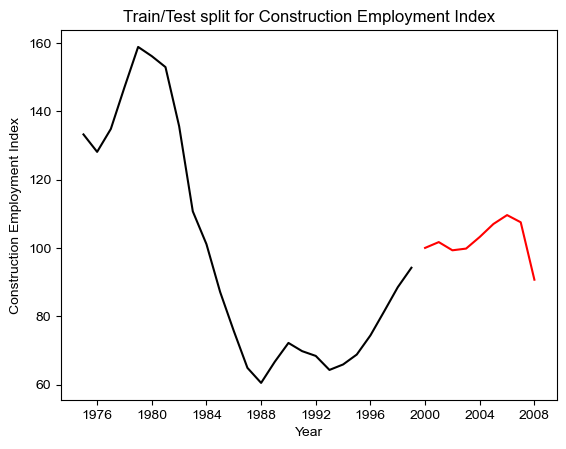

In [201]:
df6['Year'] = df6.index
#Train/ test split. Split before/after the year 2000, approx 25% split.
train = df6[df6['Year'] < pd.to_datetime("2000", format='%Y')]
train['train'] = train['VALUE']
del train['Year']
del train['VALUE']
test = df6[df6['Year'] >= pd.to_datetime("2000", format='%Y')]
del test['Year']
test['test'] = test['VALUE']
del test['VALUE']
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.title("Train/Test split for Construction Employment Index")
plt.ylabel("Construction Employment Index")
plt.xlabel('Year')
sns.set()
plt.show()

In [202]:
!pip install pmdarima

In [203]:
#Importing the ARIMA forecasting model
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=168.019, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=178.897, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=164.662, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=167.657, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=177.626, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=165.449, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=165.842, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=162.769, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=163.713, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=164.019, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=166.195, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=165.088, Time=0.03 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.388 seconds


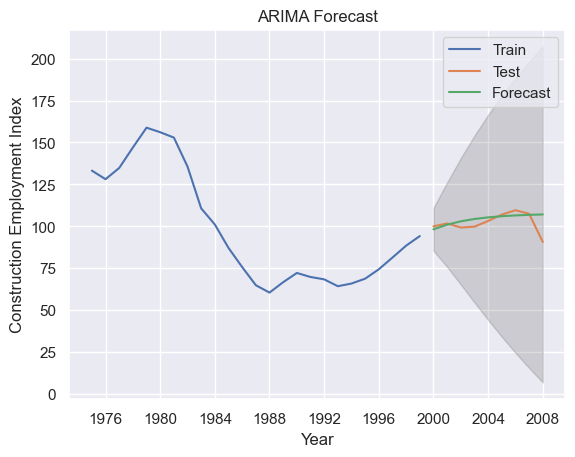

In [204]:
# Adding 95% CI
forecast, conf_int = model.predict(n_periods=len(test), return_conf_int=True, alpha=0.05)
forecast = pd.DataFrame(forecast, index=test.index, columns=['Prediction'])
lower_series = pd.Series(conf_int[:, 0], index=test.index)
upper_series = pd.Series(conf_int[:, 1], index=test.index)

#Plot the graph
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(forecast.index, forecast['Prediction'], label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Construction Employment Index')
plt.title('ARIMA Forecast')

# Add legend
plt.legend()

# Display the plot
plt.show()

In [205]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test,forecast))
print("RMSE: ", rms)

RMSE:  5.981964065376979


Forecast is in the general direction of the test data but not completely accurate. It is well within the 95% CI so can be deemed acceptable. RMSE is not overly high either so can confirm it is an acceptable model. Ref - https://builtin.com/data-science/time-series-python Ref - https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

### Sentiment Analysis

In [206]:
import itertools
import statsmodels.api as sm

In [207]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [208]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
                    continue

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.65763D+00    |proj g|=  7.77890D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      3      5      1     0     0   2.949D-07   1.658D+00
  F =   1.6576078316531522     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:333.52156633063044
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variabl

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:220.3023534660324
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07079D+00    |proj g|=  1.63746D-01

At iterate    5    f=  1.04615D+00    |proj g|=  4.27274D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     10      1     0     0   2.275D-06   1.046D+00
  F =   1.0461482386743672     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:215.22964773487345
RUNNING THE L-BFGS-B 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.26653D+00    |proj g|=  3.62456D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7      9      1     0     0   1.141D-06   1.267D+00
  F =   1.2665259671884983     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:259.30519343769964
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27085D+00    |proj g|=  3.07710D-01

At iterate    5    f=  1.15905D+00    |proj g|=  3.58647D-02

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.25899D+00    |proj g|=  4.10338D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     10      1     0     0   3.272D-06   1.259D+00
  F =   1.2589509285045277     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:255.79018570090554
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.39479D+00    |proj g|=  6.01126D-06

           * * *

Tit   = total number of iterations
Tnf   = total number o

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     23      1     0     0   2.123D-05   1.341D+00
  F =   1.3414466231426692     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:272.28932462853385
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13083D+00    |proj g|=  1.79706D-01

At iterate    5    f=  9.92389D-01    |proj g|=  4.28077D-02

At iterate   10    f=  9.91473D-01    |proj g|=  1.47717D-05

           * 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:218.70789692677448
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18099D+00    |proj g|=  1.56046D-01

At iterate    5    f=  1.09202D+00    |proj g|=  4.02301D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     11      1     0     0   1.986D-05   1.092D+00
  F =   1.0920213737374651     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:224.40427474749302
RUNNING THE L-BFGS-B

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.00708D+00    |proj g|=  2.76573D-03

At iterate   10    f=  1.00704D+00    |proj g|=  8.21565D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     12      1     0     0   8.216D-07   1.007D+00
  F =   1.0070430624989648     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:207.40861249979298
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33829D+00    |proj g|=  4.12698D-01

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.21258D+00    |proj g|=  1.93562D-01

At iterate   10    f=  1.20745D+00    |proj g|=  1.44645D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     29      1     0     0   1.446D-03   1.207D+00
  F =   1.2074467161607063     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:247.48934323214127
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16819D+00    |proj g|=  2.01724D-01
  ys=-2.884E-0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.88075D-01    |proj g|=  3.44434D-03

At iterate   10    f=  9.87889D-01    |proj g|=  1.72651D-03

At iterate   15    f=  9.87083D-01    |proj g|=  1.27393D-02

At iterate   20    f=  9.84375D-01    |proj g|=  1.70598D-02

At iterate   25    f=  9.84298D-01    |proj g|=  1.54372D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     35      1     0     0   6.916D-06   9.843D-01
  F =  0.98429787957631720     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:204.85957591526343
RUNNING THE L-BFGS-B CODE

           * * *

Machine prec

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.07192D+00    |proj g|=  3.92676D-03

At iterate   10    f=  1.07064D+00    |proj g|=  1.47046D-02

At iterate   15    f=  1.07043D+00    |proj g|=  1.54443D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     29      1     0     0   1.544D-05   1.070D+00
  F =   1.0704284539339448     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:222.08569078678894
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.24665D+00    |proj g|=  2.64959D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      7      1     0     0   2.650D-06   1.247D+00
  F =   1.2466485583857037     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:255.32971167714075
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.54836D+00    |proj g|=  3.90379D-06

           * * *

Tit   = total number of iterations
Tnf   = total number o

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.18177D+00    |proj g|=  6.47881D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     12      1     0     0   7.122D-07   1.182D+00
  F =   1.1817448979086391     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:244.34897958172783
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30407D+00    |proj g|=  2.52614D-01

At iterate    5    f=  1.20916D+00    |proj g|=  1.72136D-02

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.92843D-01    |proj g|=  3.62354D-02

At iterate   10    f=  9.90320D-01    |proj g|=  1.10572D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     16      1     0     0   1.646D-06   9.903D-01
  F =  0.99031971521994788     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:206.06394304398958
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16228D+00    |proj g|=  2.47227D-01

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15819D+00    |proj g|=  3.30002D-01

At iterate    5    f=  1.07463D+00    |proj g|=  6.50211D-02

At iterate   10    f=  1.07268D+00    |proj g|=  2.56125D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     15      1     0     0   8.770D-07   1.073D+00
  F =   1.0726837645436127     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:222.53675290872255
RUNNING THE L-

 This problem is unconstrained.


In [209]:
!pip install praw wordcloud python-dotenv nltk

# misc tools
from pprint import pprint
from itertools import chain

#Reddit crawler
import praw

#Sentiment analysis packages
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize, RegexpTokenizer # tokenize words
from nltk.corpus import stopwords

#Visualization
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 8) # default plot size
sns.set(style='whitegrid', palette='Dark2')
from wordcloud import WordCloud

In [210]:
#Models for sentiment analysis 
nltk.download('vader_lexicon') # get lexicons data
nltk.download('punkt') # for tokenizer
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/seankearney/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/seankearney/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/seankearney/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [211]:
#Load the api client id and secret from .env file
from dotenv import load_dotenv
from os import getenv
load_dotenv()

USER_AGENT = getenv('USER_AGENT')
CLIENT_ID = getenv('CLIENT_ID')
CLIENT_SECRET = getenv('CLIENT_SECRET')

In [212]:
#Set up Reddit Client
r = praw.Reddit(user_agent=USER_AGENT,
                client_id=CLIENT_ID,
                client_secret=CLIENT_SECRET,
                check_for_async=True)

In [213]:
#Scrape subreddits for mentions of keywords.
subreddits = ['ireland', 'RealEstate', 'PersonalFinance', 'RealEstateInvesting']  # List of subreddits
keyword_combinations = [
    ['house', 'price'],
    ['building', 'cost'],
    ['construction', 'salary']
]  

results = []

#Both keywords in each keyword_combination must be preset.
for subreddit_name in subreddits:
    subreddit = r.subreddit(subreddit_name)
    for keywords in keyword_combinations:
        posts = subreddit.search(' '.join(keywords), time_filter='all')
        filtered_posts = [post for post in posts if all(keyword in post.title or keyword in post.selftext for keyword in keywords)]
        results.extend(filtered_posts)

print(len(results))

688


In [214]:
# Sample output
title = [result.title for result in results]
result_df = pd.DataFrame({
    "title": title,
})
result_df.head()

title
0  PSA: If you are planning on doing attic conver...
1  Irish house prices rise 8.9% in first three mo...
2              Things aren't worth the money anymore
3  Third consecutive month of house price decline...
4            Thoughts on buying a house in Drogheda?

In [215]:
#Vardar analyzer
sid = SentimentIntensityAnalyzer()

In [216]:
#Run sentiment on the post title using vardar polarity score
res = [*result_df['title'].apply(sid.polarity_scores)]
pprint(res[:3])

[{'compound': -0.3595, 'neg': 0.185, 'neu': 0.815, 'pos': 0.0},
 {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': -0.1695, 'neg': 0.25, 'neu': 0.75, 'pos': 0.0}]


In [217]:
#Create a sentiment df using the sentiment result and combine it to results df (the posts)
sentiment_df = pd.DataFrame.from_records(res)
df_vardar_results = pd.concat([result_df, sentiment_df], axis=1, join='inner')
df_vardar_results.head()

title    neg    neu  pos  \
0  PSA: If you are planning on doing attic conver...  0.185  0.815  0.0   
1  Irish house prices rise 8.9% in first three mo...  0.000  1.000  0.0   
2              Things aren't worth the money anymore  0.250  0.750  0.0   
3  Third consecutive month of house price decline...  0.000  1.000  0.0   
4            Thoughts on buying a house in Drogheda?  0.000  1.000  0.0   

   compound  
0   -0.3595  
1    0.0000  
2   -0.1695  
3    0.0000  
4    0.0000

In [218]:
#Using default threshold, see url below for futher info.
#https://github.com/cjhutto/vaderSentiment#about-the-scoring
THRESHOLD = 0.05

conditions = [
    (df_vardar_results['compound'] <= -THRESHOLD),
    (df_vardar_results['compound'] > -THRESHOLD) & (df_vardar_results['compound'] < THRESHOLD),
    (df_vardar_results['compound'] >= THRESHOLD),
    ]

values = ["neg", "neu", "pos"]
df_vardar_results['label'] = np.select(conditions, values)

df_vardar_results.head()

title    neg    neu  pos  \
0  PSA: If you are planning on doing attic conver...  0.185  0.815  0.0   
1  Irish house prices rise 8.9% in first three mo...  0.000  1.000  0.0   
2              Things aren't worth the money anymore  0.250  0.750  0.0   
3  Third consecutive month of house price decline...  0.000  1.000  0.0   
4            Thoughts on buying a house in Drogheda?  0.000  1.000  0.0   

   compound label  
0   -0.3595   neg  
1    0.0000   neu  
2   -0.1695   neg  
3    0.0000   neu  
4    0.0000   neu

In [219]:
df_vardar_results.label.value_counts()

neu    424
pos    151
neg    113
Name: label, dtype: int64

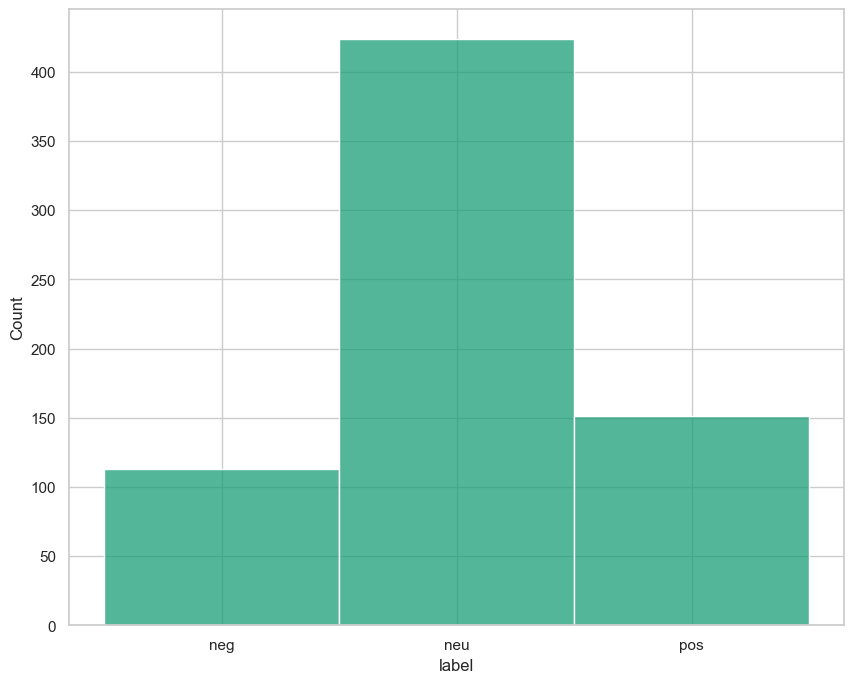

In [220]:
#Plot VARDAR results
sns.histplot(df_vardar_results.label);

In [221]:
def results_title_output(df, label):
  res = df[df['label'] == label].title.values
  print(f'{"=" * 20}')
  print("\n".join(title for title in res))

# randomly sample
results_sub = df_vardar_results.groupby('label').sample(n = 5, random_state = 7)

#Display the results
print("Positive news")
results_title_output(results_sub, "pos")

print("\nNeutral news")
results_title_output(results_sub, "neu")

print("\nNegative news")
results_title_output(results_sub, "neg")

Positive news
I know someone who will build me a house at cost, how much money does that really save and is it worth it?
Agent being vague about costs: sellers want me to pay a certain amount for repairs
Trying to buy a house in this market makes me want to throw up
How can I ensure I get the best deal on a construction loan?
Attempting to sell, please explain my selling agents actions

Neutral news
How to use rent from roommates as an income to buy a single family house?
Trying to build a house + need financial advice
I need objective advice on buying a home.
Painters Price Cartel or am I being underpriced?
Can we afford this house when we have kids in the future?

Negative news
Raised 2 children to 18 in NYC and have next to nothing saved for retirement-it was expensive. How do I attack this in a realistic way?
Am I dumb for investing in a taxable account in my 20s?
Dad is struggling financially, should I work with him or somewhere else
Is this too much house? Don’t want to be house 

In [222]:
# Stop words
stop_words = stopwords.words('english')
print(len(stop_words))
print(stop_words[:10])

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [223]:
# Tokenisation function to remove stop words and clean data 
def custom_tokenize(text):
  # remove single quote and dashes
  text = text.replace("'", "").replace("-", "").lower()

  # split on words only
  tk = nltk.tokenize.RegexpTokenizer(r'\w+')
  tokens = tk.tokenize(text)

  # remove stop words
  words = [w for w in tokens if not w in stop_words]
  return words


In [224]:
# convert results to words
def tokens_2_words(df, label):
  # subset titles based on label
  titles = df[df['label'] == label].title
  # apply our custom tokenize function to each title
  tokens = titles.apply(custom_tokenize)
  # join nested lists into a single list
  words = list(chain.from_iterable(tokens))
  return words

pos_words = tokens_2_words(df_vardar_results, 'pos')
neg_words = tokens_2_words(df_vardar_results, 'neg')

In [225]:
# Top 20 positive words
pos_freq = nltk.FreqDist(pos_words)
pos_freq.most_common(20)

[('house', 36),
 ('home', 31),
 ('building', 25),
 ('buy', 20),
 ('cost', 14),
 ('land', 13),
 ('new', 13),
 ('build', 12),
 ('property', 12),
 ('much', 12),
 ('want', 11),
 ('help', 11),
 ('best', 11),
 ('would', 11),
 ('offer', 10),
 ('costs', 10),
 ('real', 10),
 ('worth', 10),
 ('way', 9),
 ('buying', 9)]

In [226]:
# Top 20 negative words
neg_freq = nltk.FreqDist(neg_words)
neg_freq.most_common(20)

[('house', 21),
 ('housing', 16),
 ('buying', 12),
 ('home', 12),
 ('building', 10),
 ('buy', 9),
 ('pay', 9),
 ('cost', 7),
 ('mortgage', 7),
 ('market', 6),
 ('advice', 6),
 ('people', 5),
 ('offer', 5),
 ('crisis', 5),
 ('afford', 5),
 ('first', 5),
 ('back', 5),
 ('debt', 5),
 ('need', 4),
 ('prices', 4)]

In [227]:
def plot_word_cloud(words, colormap, stopwords = [], max_words = 100):
  text = " ".join(word for word in words)
  # generate word cloud 
  wordcloud = WordCloud(width=1000, height = 600,
                        max_words = max_words,
                        colormap=colormap,
                        stopwords = stopwords,
                        background_color="black").generate(text)

  # Display the generated image:
  plt.figure( figsize=(20,10), facecolor='k' )
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off");

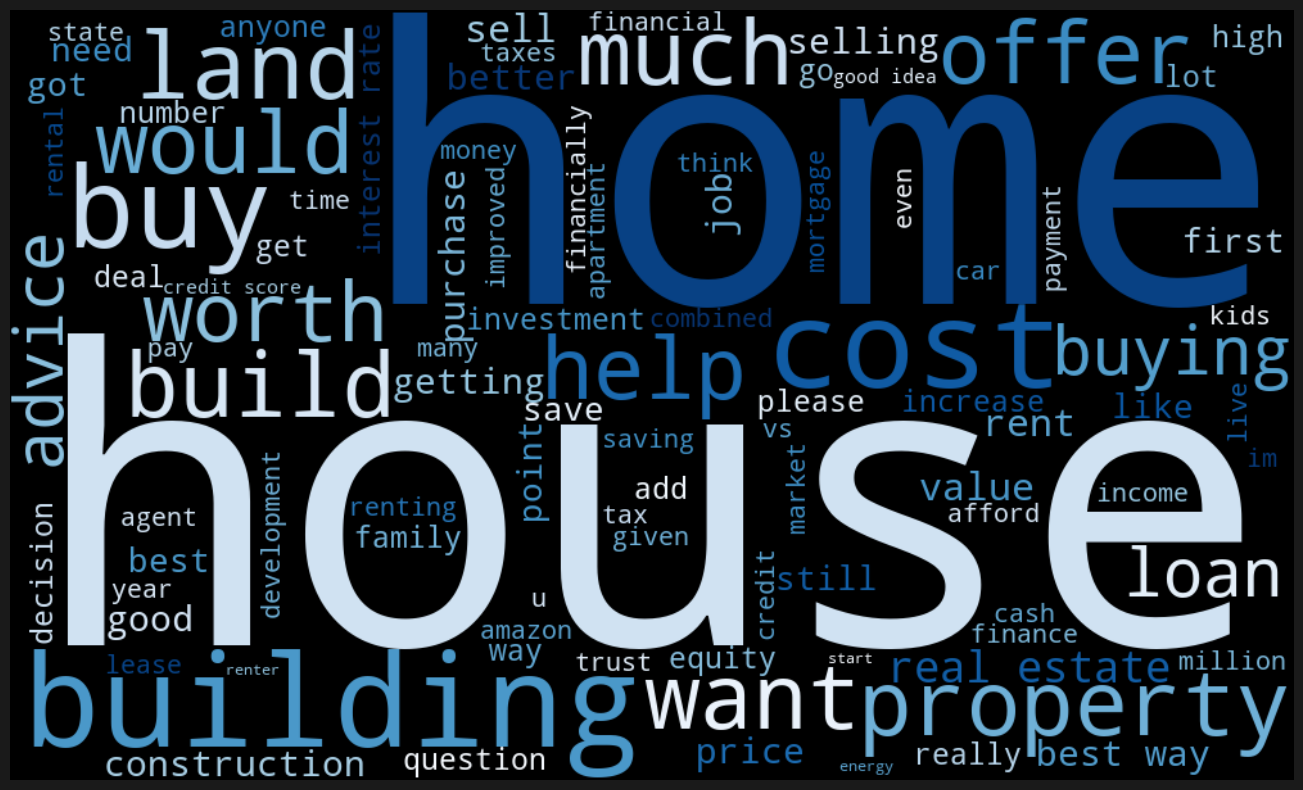

In [228]:
custom_stopwords = ["new", "could", "say", "says"]
plot_word_cloud(pos_words, "Blues", custom_stopwords)

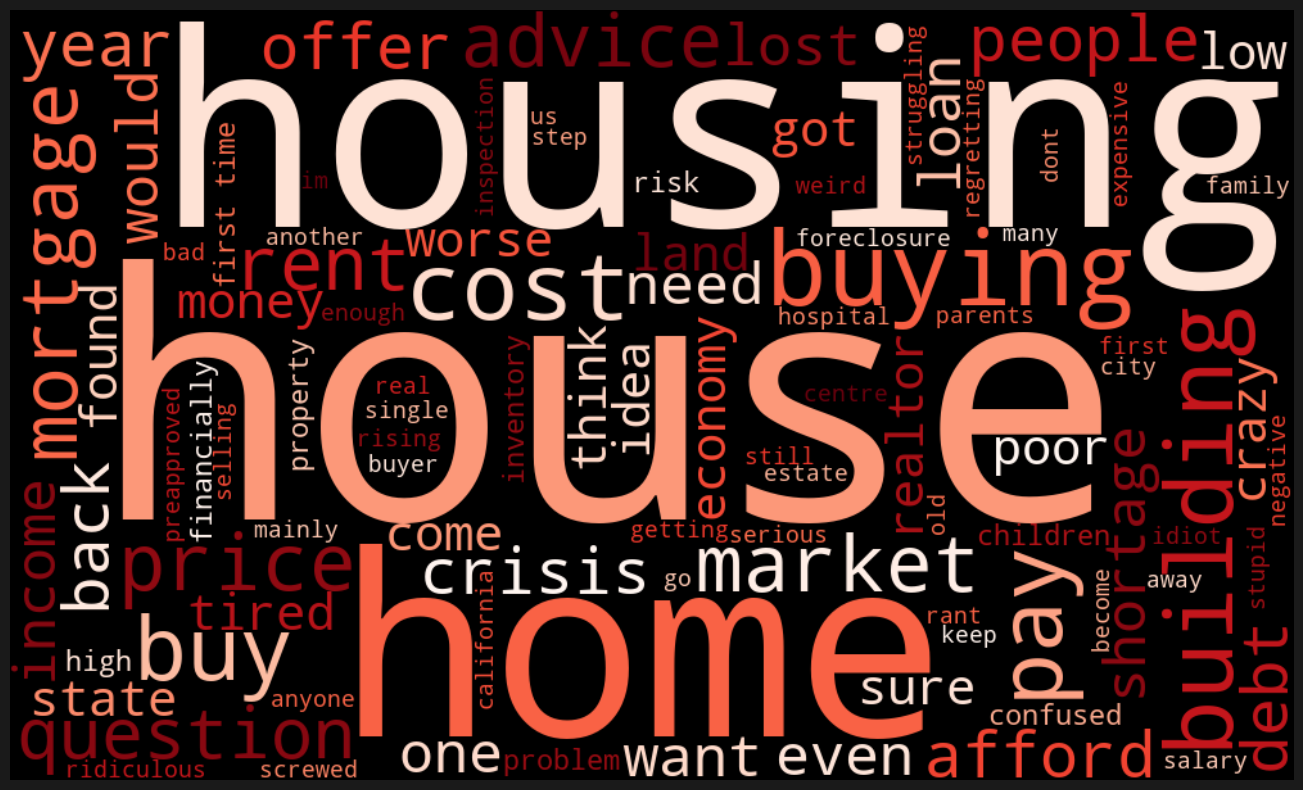

In [229]:
plot_word_cloud(neg_words, "Reds", custom_stopwords)

In [230]:
# let's test vardars accurancy on a subset of the data, 
# This json file was annotated manually to include a neu, neg or pos label based on how i perceived the reddit titles. Vardar should match this.
def format_output(output_dict):
  
  polarity = "neu"

  if(output_dict['compound'] >= 0.05):
    polarity = "pos"

  elif(output_dict['compound'] <= -0.05):
    polarity = "neg"

  return polarity


def predict_sentiment(text):
  
  output_dict =  sid.polarity_scores(text)
  return format_output(output_dict)

df_vardar_accuracy = pd.read_json('annotated_json.json').T
df_vardar_accuracy["vader_prediction"] = df_vardar_accuracy["title"].apply(predict_sentiment)

In [231]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(df_vardar_accuracy['label'], df_vardar_accuracy['vader_prediction'])

print("Accuracy: {}\n".format(accuracy))

# Show the classification report
print(classification_report(df_vardar_accuracy['label'], df_vardar_accuracy['vader_prediction']))

Accuracy: 0.6

              precision    recall  f1-score   support

         neg       0.86      0.53      0.66        47
         neu       0.62      0.74      0.67        43
         pos       0.16      0.30      0.21        10

    accuracy                           0.60       100
   macro avg       0.55      0.53      0.51       100
weighted avg       0.69      0.60      0.62       100



In [232]:
# Training Set
import random

In [233]:
analyzer = SentimentIntensityAnalyzer()

def get_features(text):
    features = {}

    # Feature #1 - verbosity
    features['verbosity'] = len(text)
    #If the VADER score for a review has a positive intensity, 
    #we’d expect that to match the value a human identified for positive reviews.
    #We can add this score as a feature in our model and run the training.
    scores = analyzer.polarity_scores(text)
    features['vader(pos)'] = scores['pos']
    features['vader(neg)'] = scores['neg']

    return features

The annotated json is used as the training model

In [234]:
#Clean data 
import string
from nltk.stem import PorterStemmer

# Store the string.punctuation into an object punct
punct = string.punctuation

# Initialise an object using a method PorterStemmer
stemmer = PorterStemmer()

In [235]:
# Create a json file with the vardar score as an attribute, We will annotate this json file with a label of neu, neg or pos outside the main object. 
# Expect this to correspond to the vardar score.
# Using 100 reddit posts for our dataset. 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import json

results2 = {}

analyzer = SentimentIntensityAnalyzer()
count = 0

for result in results:
    score = analyzer.polarity_scores(result.title)
    results2[result.id] = {
        'score': score,
        'up_down_score': result.score,
        'created': result.created_utc,
        'title': result.title,
        'text' : result.selftext
    }
    count += 1
    if count == 100:
        break


# Store results in a file for annotation
filename = 'test.json'
with open(filename, 'w') as file:
    json.dump(results2, file, indent=4)

In [236]:
#This function gets our labelled dataset for training, it contains the scraped reddit data with a label (neu, neg or pos).
#This label was added manually. This label combined with the vardar polarity score on each record should set a good baseline
#for training
def get_labeled_dataset():
    filename = 'annotated_json.json'
    with open(filename, 'r') as file:
        annotated = json.loads(file.read())

    dataset = []
    for id in annotated:
        dataset.append((annotated[id], annotated[id]['label']))

    random.shuffle(dataset)
    return dataset

### Naive Bayes classifier in NLTK

Naive Bayes Classifier in NLTK, which is an easier one to understand because it simply assumes the frequency of a label in the training set with the highest probability is likely the best match. Taking all of the reviews in the dataset and label them as positive or negative using the get_labeled_dataset function demonstrated earlier. The review is then substituted with a dictionary that identifies features believed may be important, such as verbosity, using the get_features function defined above.

In [237]:
import nltk.classify
from nltk import NaiveBayesClassifier

def analyze_model(dataset, train_percentage=0.75):
    feature_set = [(get_features(i['title']), label) for (i, label) in dataset]
    count = int(len(feature_set) * train_percentage)
    train_set, test_set = feature_set[:count], feature_set[count:]
    classifier = NaiveBayesClassifier.train(train_set)
    classifier.show_most_informative_features(5)

    accuracy = nltk.classify.accuracy(classifier, test_set)
    errors = []
    for (i, label) in dataset[count:]:
        guess = classifier.classify(get_features(i['title']))
         
        if guess != label:
            tokens = nltk.word_tokenize(i['title'])
            errors.append((label, guess, tokens[:10]))
    return (classifier, accuracy, errors)

dataset = get_labeled_dataset()

trained_classifier, accuracy, errors = analyze_model(dataset)

Most Informative Features
              vader(neg) = 0.0               neu : neg    =      2.6 : 1.0
              vader(pos) = 0.0               neu : pos    =      1.9 : 1.0
               verbosity = 45                pos : neg    =      1.9 : 1.0
               verbosity = 72                pos : neg    =      1.9 : 1.0
               verbosity = 78                pos : neg    =      1.9 : 1.0


In [238]:
accuracy

0.44

In [239]:
# Classify the filtered posts
classified_results = []
for post in results:
    features = get_features(post.title)  # Extract features from the post title or any other relevant field
    label = trained_classifier.classify(features)
    classified_results.append((post.title, label))

In [240]:
df = pd.DataFrame(classified_results, columns=['Title', 'NaiveBayesClassifier'])
df.head(50)

Title NaiveBayesClassifier
0   PSA: If you are planning on doing attic conver...                  neu
1   Irish house prices rise 8.9% in first three mo...                  neu
2               Things aren't worth the money anymore                  neg
3   Third consecutive month of house price decline...                  neu
4             Thoughts on buying a house in Drogheda?                  neu
5   Guys, I need to vent about how the Irish econo...                  pos
6   First-time buyers dominate market as average h...                  neu
7   Bulk pet food at a reasonable price. Anyone go...                  neu
8             Weird goings on in the housing market..                  neu
9   I was looking to buy a house on daft and the s...                  neu
10  Seeking Advice on Buying Property in Ireland: ...                  neu
11     How to close an AIB basic account from abroad?                  neu
12                       The Poor Are Not Your Enemy.                  neu
13            Better solutions for the housing crisis                  neu
14  Crazy house prices: ‘I think it’s starting to ...                  neg
15  I want to buy a Gaming Monitor from the U.K. A...                  pos
16                   I got my social house, now what?                  neu
17  Ukrainian friend being told by the "renter" he...                  neu
18  Does anyone think properties in Dublin are ove...                  neu
19      Slightly different take on the housing crisis                  neu
20  Help-to-Buy and First Home schemes ‘fuelling r...                  neu
21  How are people actually paying these prices fo...                  neu
22  House Prices Continue to Fall as Borrowing Cos...                  neu
23                                        Ground rent                  neu
24                      Electricity bill skyrocketed?                  neu
25  Rents up by 16%, house prices by 34% since 201...                  neu
26                                    Energy Upgrades                  neu
27  Looking to build a house and BRB Homes has pop...                  neu
28                         5 year relationship ending                  neu
29  Apartment Management Company Trying to Take th...                  neg
30  Found a reasonably priced house I could afford...                  neu
31  Between 2014 and 2020, Paris lost 75,000 resid...                  neu
32  Can we ask for proof of other offer on the hou...                  neu
33                               50,000 houses a year                  neu
34  Property prices Ireland: Exodus of landlords b...                  neu
35  How do estate agents decide who gets the house...                  neg
36  Need advice on abusive parents, not sure what ...                  neu
37        A Rated House - Average Elec Bill Last Year                  neu
38                               Screwed over a house                  neu
39             House furnishing tips/recommendations?                  neu
40                      This country is a shithole...                  neu
41  Housing estate not taken in charge by county c...                  neu
42  Seeking Advice re: House Renovation Supplies i...                  neu
43  Swapping homes with neighbour - logistics with...                  neu
44         What is with the price of 1 bed apartments                  neu
45                       Has Crumlin been gentrified?                  neu
46  Has anyone heard of Kingscroft developers? How...                  neu
47       anyone think house prices will fall in 2023?                  neu
48  windfall taxes planned on energy companies... ...                  neu
49      My opinion on the Immigration stuff happening                  neu

### Bag of words vectorizer sentiment analysis 

In [241]:
df_annotated = pd.read_json('annotated_json.json').T

In [242]:
df_annotated

score up_down_score  \
13jyrhv  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...            41   
124fmjq  {'neg': 0.12, 'neu': 0.88, 'pos': 0.0, 'compou...           119   
13ejsvy  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...           246   
121mnfo  {'neg': 0.156, 'neu': 0.844, 'pos': 0.0, 'comp...           116   
1253s1q  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...            14   
...                                                    ...           ...   
y8fkla   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...            29   
wb60pg   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...            18   
zmgkbw   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...             0   
wkhrb6   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...             1   
xu0zon   {'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'comp...             0   

              created                                              title  \
13jyrhv  1684322163.0  Third consecutive month of house price decline...   
124fmjq  1679984962.0  First-time buyers dominate market as average h...   
13ejsvy  1683802431.0  Irish house prices rise 8.9% in first three mo...   
121mnfo  1679752715.0  Crazy house prices: ‘I think it’s starting to ...   
1253s1q  1680040637.0  House Prices Continue to Fall as Borrowing Cos...   
...               ...                                                ...   
y8fkla   1666216419.0  Builders should not decide housing locations, ...   
wb60pg   1659104295.0  [Update] State to sink another €450m into leas...   
zmgkbw   1671094804.0        Ba cheart d’Éirinn Corn an Domhain a óstáil   
wkhrb6   1660087080.0                          Cottage Renovation Advice   
xu0zon   1664747550.0  Genuine question, in your opinion, where is th...   

                                                      text label  
13jyrhv                                                      pos  
124fmjq                                                      neu  
13ejsvy                                                      neg  
121mnfo                                                      neg  
1253s1q  Source: OECD (link in comments) \n\nDo you thi...   neu  
...                                                    ...   ...  
y8fkla   "Mr Cussen warned against “loose talk” which m...   neu  
wb60pg   Hi All, \n\nOriginal Article:  [reddit.com/r/i...   neu  
zmgkbw   Hear me out: I know the normal the automatic r...   neu  
wkhrb6   Hey 👋 so myself and my boyfriend are looking a...   neu  
xu0zon   Obviously a lot of factors come into play when...   neu  

[100 rows x 6 columns]

In [243]:
#Define X
X = df_annotated['text']

In [244]:
#Define y
y = df_annotated['label']

In [245]:
# Clean the data 
import re

cleaned_data=[]

# For loop from first value to length(X), ^a-zA-Z means include small and capital case letters

for i in range(len(X)):
    post = re.sub('[^a-zA-Z]', ' ', X.iloc[i])
    post = post.lower().split()
    post = [stemmer.stem(word) for word in post if (word not in stop_words) and (word not in punct)]
    post = ' '.join(post)
    cleaned_data.append(post)

In [246]:
# Pre-Prcoessing and Bag of Word Vectorization using Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv    = CountVectorizer(stop_words = 'english',ngram_range = (1, 1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(cleaned_data)

text_counts

<100x1623 sparse matrix of type '<class 'numpy.int64'>'
	with 3314 stored elements in Compressed Sparse Row format>

In [247]:
#Splitting the data into trainig and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, y, test_size=0.25, random_state=5)

In [248]:
text_counts.shape, X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((100, 1623), (75, 1623), (25, 1623), (75,), (25,))

In [249]:
# Training the model
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

# Caluclating the accuracy score of the model
from sklearn import metrics
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("Accuracy Score: ",accuracy_score)

Accuracy Score:  0.56


### TfidfVectorizer method

In [250]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an object 'tf' by calling a method TfidfVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

# Train the dataset by calling a method fit_tranform() 
X_tfidf = tfidf.fit_transform(cleaned_data).toarray()

In [251]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Instantiate an object model by calling a method MultinomialNB()
model_tdidf = MultinomialNB()

In [252]:
# Split the dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.25)

In [253]:
# Train the model by calling a method fit()
model_tdidf.fit(X_train, y_train)

MultinomialNB()

In [254]:
# Call predict() method
y_pred = model_tdidf.predict(X_test)

In [255]:
from sklearn.metrics import classification_report

# Instantiate a mthod named as Cla
cf = classification_report(y_test, y_pred)

# Display the values of an object cf
print(cf)


              precision    recall  f1-score   support

         neg       1.00      0.13      0.24        15
         neu       0.30      1.00      0.47         7
         pos       0.00      0.00      0.00         3

    accuracy                           0.36        25
   macro avg       0.43      0.38      0.23        25
weighted avg       0.69      0.36      0.27        25



In [256]:
accuracy_score = metrics.accuracy_score(y_pred, y_test)
print("Accuracy Score: ",accuracy_score)

Accuracy Score:  0.36


In [257]:
# Logistic Regression 
df_log = df_annotated

In [258]:
df_log

score up_down_score  \
13jyrhv  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...            41   
124fmjq  {'neg': 0.12, 'neu': 0.88, 'pos': 0.0, 'compou...           119   
13ejsvy  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...           246   
121mnfo  {'neg': 0.156, 'neu': 0.844, 'pos': 0.0, 'comp...           116   
1253s1q  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...            14   
...                                                    ...           ...   
y8fkla   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...            29   
wb60pg   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...            18   
zmgkbw   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...             0   
wkhrb6   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...             1   
xu0zon   {'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'comp...             0   

              created                                              title  \
13jyrhv  1684322163.0  Third consecutive month of house price decline...   
124fmjq  1679984962.0  First-time buyers dominate market as average h...   
13ejsvy  1683802431.0  Irish house prices rise 8.9% in first three mo...   
121mnfo  1679752715.0  Crazy house prices: ‘I think it’s starting to ...   
1253s1q  1680040637.0  House Prices Continue to Fall as Borrowing Cos...   
...               ...                                                ...   
y8fkla   1666216419.0  Builders should not decide housing locations, ...   
wb60pg   1659104295.0  [Update] State to sink another €450m into leas...   
zmgkbw   1671094804.0        Ba cheart d’Éirinn Corn an Domhain a óstáil   
wkhrb6   1660087080.0                          Cottage Renovation Advice   
xu0zon   1664747550.0  Genuine question, in your opinion, where is th...   

                                                      text label  
13jyrhv                                                      pos  
124fmjq                                                      neu  
13ejsvy                                                      neg  
121mnfo                                                      neg  
1253s1q  Source: OECD (link in comments) \n\nDo you thi...   neu  
...                                                    ...   ...  
y8fkla   "Mr Cussen warned against “loose talk” which m...   neu  
wb60pg   Hi All, \n\nOriginal Article:  [reddit.com/r/i...   neu  
zmgkbw   Hear me out: I know the normal the automatic r...   neu  
wkhrb6   Hey 👋 so myself and my boyfriend are looking a...   neu  
xu0zon   Obviously a lot of factors come into play when...   neu  

[100 rows x 6 columns]

In [259]:
X_train = df_log['title'].values[:51]
y_train = df_log['label'].values[:51]
X_test = df_log['title'].values[51:]
y_test = df_log['label'].values[51:]

In [260]:
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

def tokenizer(text):
    return text.split()


def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [261]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)

param_grid = [{'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop_words, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              {'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop_words, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'vect__use_idf':[False],
               'vect__norm':[None],
               'clf__penalty': ['l1','l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              ]

lr_tfidf = Pipeline([('vect', tfidf),
                     ('clf', LogisticRegression(random_state=0))])

gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

In [262]:
gs_lr_tfidf.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/Users/seankearney/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', "it'", 'onc', 'onli', 'ourselv', "she'", "should'v", 'themselv', 'thi', 'veri', 'wa', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  warnings.warn(
/Users/seankearney/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', "it'", 'onc', 'onli', 'ourselv', "she'", "should'v", 'themselv', 'thi', 'veri', 'wa', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  warnings.warn(
/Users/seankearney/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your sto

/Users/seankearney/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', "it'", 'onc', 'onli', 'ourselv', "she'", "should'v", 'themselv', 'thi', 'veri', 'wa', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  warnings.warn(
/Users/seankearney/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', "it'", 'onc', 'onli', 'ourselv', "she'", "should'v", 'themselv', 'thi', 'veri', 'wa', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  warnings.warn(
/Users/seankearney/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your sto

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf',
                                        LogisticRegression(random_state=0))]),
             n_jobs=-1,
             param_grid=[{'clf__C': [1.0, 10.0, 100.0],
                          'clf__penalty': ['l1', 'l2'],
                          'vect__ngram_range': [(1, 1)],
                          'vect__stop_words': [['i', 'me', 'my', 'myself', 'we',
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd",...
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd", 'your',
                                                'yours', 'yourself',
                                                'yourselves', 'he', 'him',
                                                'his', 'himself', 'she',
                                                "she's", 'her', 'hers',
                                                'herself', 'it', "it's", 'its',
                                                'itself', ...],
                                               None],
                          'vect__tokenizer': [<function tokenizer at 0x7f7fd67ef700>,
                                              <function tokenizer_porter at 0x7f7fd67ef4c0>],
                          'vect__use_idf': [False]}],
             scoring='accuracy', verbose=1)

In [263]:
print('Best parameter set: %s ' % gs_lr_tfidf.best_params_)
print('CV Accuracy: %.3f' % gs_lr_tfidf.best_score_)

Best parameter set: {'clf__C': 1.0, 'clf__penalty': 'l2', 'vect__ngram_range': (1, 1), 'vect__stop_words': ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each',

In [264]:
clf = gs_lr_tfidf.best_estimator_
print('Test Accuracy: %.3f' % clf.score(X_test, y_test))

Test Accuracy: 0.265


Ref - https://www.codeproject.com/Articles/5269453/Improving-NLTK-Sentiment-Analysis-with-Data-Annota